# Windy Gridworld

## ÁéØÂ¢ÉËÆæÁΩÆ
- ÁΩëÊ†ºÔºö7Ë°å √ó 10Âàó
- ÂùêÊ†áÁ≥ªÁªüÔºöÂ∑¶‰∏äËßí‰∏∫ÂéüÁÇπ(0,0)ÔºåË°åÂè∑0-6ÔºåÂàóÂè∑0-9
- Âä®‰ΩúÔºö8ÂêëÁßªÂä®ÔºàKing's movesÔºâ
- ÁõÆÊ†áÁä∂ÊÄÅÔºö(3,7) - episodeÁªìÊùü
- Ê≠ª‰∫°Áä∂ÊÄÅÔºö(0,9) - Â•ñÂä±-100ÔºåepisodeÁªìÊùü
- ÊØèÊ≠•Â•ñÂä±Ôºö-1
- È£éÂêëÔºöÁâπÂÆöÂàóÊúâÂêë‰∏äÁöÑÈ£é

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, FancyArrow
import time

# ÈÖçÁΩÆ‰∏≠ÊñáÂ≠ó‰ΩìÊîØÊåÅ
plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'SimHei', 'Microsoft YaHei', 'Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False  # Ëß£ÂÜ≥Ë¥üÂè∑ÊòæÁ§∫ÈóÆÈ¢ò

## 1. ÁéØÂ¢ÉÂÆö‰πâ

In [2]:
class WindyGridworld:
    def __init__(self, king_moves=True, absorbing_state=None):
        """
        ÂàùÂßãÂåñWindy GridworldÁéØÂ¢É
        
        ÂèÇÊï∞:
            king_moves: bool - ÊòØÂê¶ÂÖÅËÆ∏8ÂêëÁßªÂä®ÔºåFalseÂàôÂè™ÂÖÅËÆ∏4Âêë(Rook moves)
            absorbing_state: tuple - Âê∏Êî∂Áä∂ÊÄÅ‰ΩçÁΩÆÔºåÂ¶Ç(0,3)ÔºåÂ•ñÂä±+5
        """
        self.rows = 7
        self.cols = 10
        self.goal_state = (3, 7)  # ÁõÆÊ†áÁä∂ÊÄÅÔºàÂ∑¶‰∏äËßí‰∏∫(0,0)Ôºâ
        self.death_state = (0, 9)  # Ê≠ª‰∫°Áä∂ÊÄÅ
        self.absorbing_state = absorbing_state  # Âê∏Êî∂Áä∂ÊÄÅÔºà‰ªªÂä°7Ôºâ
        
        # È£éÂêëÂÆö‰πâÔºöÂàóÁ¥¢Âºï -> Âêë‰∏äÊé®ÁöÑÊ†ºÊï∞Ôºà0-basedÁ¥¢ÂºïÔºâ
        self.wind = {
            3: 1, 4: 1, 5: 1,  # Âàó3,4,5: Âêë‰∏ä1Ê†º
            6: 2, 7: 2,        # Âàó6,7: Âêë‰∏ä2Ê†º  
            8: 1               # Âàó8: Âêë‰∏ä1Ê†º
        }
        
        # Âä®‰ΩúÂÆö‰πâ
        if king_moves:
            # 8ÂêëÁßªÂä®ÔºàKing's movesÔºâ
            self.actions = ['n', 'ne', 'e', 'se', 's', 'sw', 'w', 'nw']
            self.action_effects = {
                'n': (-1, 0), 'ne': (-1, 1), 'e': (0, 1), 'se': (1, 1),
                's': (1, 0), 'sw': (1, -1), 'w': (0, -1), 'nw': (-1, -1)
            }
        else:
            # 4ÂêëÁßªÂä®ÔºàRook movesÔºâ
            self.actions = ['n', 'e', 's', 'w']
            self.action_effects = {
                'n': (-1, 0), 'e': (0, 1), 's': (1, 0), 'w': (0, -1)
            }
        
        # ÊâÄÊúâÁä∂ÊÄÅÔºà0-basedÁ¥¢ÂºïÔºâ
        self.states = [(r, c) for r in range(self.rows) 
                       for c in range(self.cols)]
    
    def step(self, state, action):
        """
        ÊâßË°åÂä®‰ΩúÔºåËøîÂõû‰∏ã‰∏Ä‰∏™Áä∂ÊÄÅÂíåÂ•ñÂä±
        
        ËøîÂõû: (next_state, reward, done)
        """
        # Â¶ÇÊûúÂ∑≤ÁªèÂú®ÁªàÊ≠¢Áä∂ÊÄÅÔºå‰∏çËÉΩÂÜçÁßªÂä®
        if self.is_terminal(state):
            return state, 0, True
        
        row, col = state
        d_row, d_col = self.action_effects[action]
        
        # Â∫îÁî®Âä®‰Ωú
        new_row = row + d_row
        new_col = col + d_col
        
        # Â∫îÁî®È£éÔºàÂè™ÂΩ±ÂìçÂûÇÁõ¥ÊñπÂêëÔºâ
        if new_col in self.wind:
            new_row -= self.wind[new_col]  # È£éÂêë‰∏äÊé®
        
        # ËæπÁïåÊ£ÄÊü•Ôºà0-basedÁ¥¢ÂºïÔºâ
        new_row = max(0, min(self.rows - 1, new_row))
        new_col = max(0, min(self.cols - 1, new_col))
        
        next_state = (new_row, new_col)
        
        # ‚úÖ Â•ñÂä±ËÆæÁΩÆÔºàÂ∑≤‰øÆÂ§çÔºâ
        # ÊôÆÈÄöÊ≠•È™§Ôºö-1ÔºàÈºìÂä±ÊúÄÁü≠Ë∑ØÂæÑÔºâ
        # ÁªàÊ≠¢Áä∂ÊÄÅÁöÑÂç≥Êó∂Â•ñÂä±Ôºö
        if next_state == self.death_state:
            return next_state, -100, True  # Ê≠ª‰∫°ÔºöÁ¥ØÁßØÁ∫¶-114
        elif next_state == self.absorbing_state:
            return next_state, 5, True     # Âê∏Êî∂ÔºöÁ¥ØÁßØÁ∫¶-2
        elif next_state == self.goal_state:
            return next_state, 10, True    # ‚úÖ ÁõÆÊ†áÔºöÁ¥ØÁßØÁ∫¶+1ÔºàÊúÄ‰ºòÔºÅÔºâ
        else:
            return next_state, -1, False   # ÊôÆÈÄöÊ≠•È™§Ôºö-1
    
    def is_terminal(self, state):
        """Âà§Êñ≠ÊòØÂê¶‰∏∫ÁªàÊ≠¢Áä∂ÊÄÅ"""
        terminals = [self.goal_state, self.death_state]
        if self.absorbing_state:
            terminals.append(self.absorbing_state)
        return state in terminals
    
    def random_action(self):
        """ÈöèÊú∫ÈÄâÊã©‰∏Ä‰∏™Âä®‰Ωú"""
        return np.random.choice(self.actions)

## 2. SARSA ÁÆóÊ≥ïÂÆûÁé∞

In [3]:
def sarsa(env, start_state, episodes=10000, alpha=0.1, gamma=1.0, epsilon=0.1, epsilon_decay=False, optimistic_init=0.0):
    """
    SARSAÁÆóÊ≥ï (on-policy)
    
    ÂèÇÊï∞:
        env: WindyGridworldÁéØÂ¢É
        start_state: Ëµ∑ÂßãÁä∂ÊÄÅ
        episodes: ËÆ≠ÁªÉÂõûÂêàÊï∞
        alpha: Â≠¶‰π†Áéá
        gamma: ÊäòÊâ£Âõ†Â≠ê
        epsilon: epsilon-greedyÁ≠ñÁï•ÁöÑÊé¢Á¥¢ÁéáÔºàÊàñÂàùÂßãÊé¢Á¥¢ÁéáÔºâ
        epsilon_decay: ÊòØÂê¶‰ΩøÁî®epsilonË°∞Âáè
        optimistic_init: QÂÄºÁöÑ‰πêËßÇÂàùÂßãÂåñÂÄºÔºà>0ÈºìÂä±Êé¢Á¥¢Ôºâ
    
    ËøîÂõû:
        Q: QÂÄºË°®
        steps_per_episode: ÊØè‰∏™episodeÁöÑÊ≠•Êï∞ÂàóË°®
    """
    # ÂàùÂßãÂåñQË°®Ôºà‰πêËßÇÂàùÂßãÂåñÈºìÂä±Êé¢Á¥¢Ôºâ
    Q = {(s, a): optimistic_init for s in env.states for a in env.actions}
    
    steps_per_episode = []
    
    # EpsilonË°∞ÂáèÂèÇÊï∞
    epsilon_start = epsilon
    epsilon_end = 0.01
    epsilon_decay_rate = (epsilon_start - epsilon_end) / (episodes * 0.7)  # Ââç70%ÁöÑËΩÆÊ¨°Ë°∞Âáè
    
    for episode in range(episodes):
        # ËÆ°ÁÆóÂΩìÂâçepsilon
        if epsilon_decay:
            current_epsilon = max(epsilon_end, epsilon_start - episode * epsilon_decay_rate)
        else:
            current_epsilon = epsilon
        
        state = start_state
        
        # epsilon-greedyÈÄâÊã©Âä®‰Ωú
        if np.random.random() < current_epsilon:
            action = env.random_action()
        else:
            action = max(env.actions, key=lambda a: Q[(state, a)])
        
        steps = 0
        
        while not env.is_terminal(state):
            # ÊâßË°åÂä®‰Ωú
            next_state, reward, done = env.step(state, action)
            
            # ÈÄâÊã©‰∏ã‰∏Ä‰∏™Âä®‰Ωú (on-policy)
            if not done:
                if np.random.random() < current_epsilon:
                    next_action = env.random_action()
                else:
                    next_action = max(env.actions, key=lambda a: Q[(next_state, a)])
            else:
                next_action = None
            
            # SARSAÊõ¥Êñ∞
            if next_action is not None:
                Q[(state, action)] += alpha * (reward + gamma * Q[(next_state, next_action)] - Q[(state, action)])
            else:
                Q[(state, action)] += alpha * (reward - Q[(state, action)])
            
            state = next_state
            action = next_action
            steps += 1
            
            # Èò≤Ê≠¢Êó†ÈôêÂæ™ÁéØ
            if steps > 1000:
                break
        
        steps_per_episode.append(steps)
    
    return Q, steps_per_episode

## 3. Q-Learning ÁÆóÊ≥ïÂÆûÁé∞

In [4]:
def q_learning(env, start_state, episodes=10000, alpha=0.1, gamma=1.0, epsilon=0.1, epsilon_decay=False, optimistic_init=0.0):
    """
    Q-LearningÁÆóÊ≥ï (off-policy)
    
    ÂèÇÊï∞:
        env: WindyGridworldÁéØÂ¢É
        start_state: Ëµ∑ÂßãÁä∂ÊÄÅ
        episodes: ËÆ≠ÁªÉÂõûÂêàÊï∞
        alpha: Â≠¶‰π†Áéá
        gamma: ÊäòÊâ£Âõ†Â≠ê
        epsilon: epsilon-greedyÁ≠ñÁï•ÁöÑÊé¢Á¥¢ÁéáÔºàÊàñÂàùÂßãÊé¢Á¥¢ÁéáÔºâ
        epsilon_decay: ÊòØÂê¶‰ΩøÁî®epsilonË°∞Âáè
        optimistic_init: QÂÄºÁöÑ‰πêËßÇÂàùÂßãÂåñÂÄºÔºà>0ÈºìÂä±Êé¢Á¥¢Ôºâ
    
    ËøîÂõû:
        Q: QÂÄºË°®
        steps_per_episode: ÊØè‰∏™episodeÁöÑÊ≠•Êï∞ÂàóË°®
    """
    # ÂàùÂßãÂåñQË°®Ôºà‰πêËßÇÂàùÂßãÂåñÈºìÂä±Êé¢Á¥¢Ôºâ
    Q = {(s, a): optimistic_init for s in env.states for a in env.actions}
    
    steps_per_episode = []
    
    # EpsilonË°∞ÂáèÂèÇÊï∞
    epsilon_start = epsilon
    epsilon_end = 0.01
    epsilon_decay_rate = (epsilon_start - epsilon_end) / (episodes * 0.7)  # Ââç70%ÁöÑËΩÆÊ¨°Ë°∞Âáè
    
    for episode in range(episodes):
        # ËÆ°ÁÆóÂΩìÂâçepsilon
        if epsilon_decay:
            current_epsilon = max(epsilon_end, epsilon_start - episode * epsilon_decay_rate)
        else:
            current_epsilon = epsilon
        
        state = start_state
        steps = 0
        
        while not env.is_terminal(state):
            # epsilon-greedyÈÄâÊã©Âä®‰Ωú
            if np.random.random() < current_epsilon:
                action = env.random_action()
            else:
                action = max(env.actions, key=lambda a: Q[(state, a)])
            
            # ÊâßË°åÂä®‰Ωú
            next_state, reward, done = env.step(state, action)
            
            # Q-LearningÊõ¥Êñ∞ (‰ΩøÁî®max)
            if not done:
                max_next_q = max(Q[(next_state, a)] for a in env.actions)
                Q[(state, action)] += alpha * (reward + gamma * max_next_q - Q[(state, action)])
            else:
                Q[(state, action)] += alpha * (reward - Q[(state, action)])
            
            state = next_state
            steps += 1
            
            # Èò≤Ê≠¢Êó†ÈôêÂæ™ÁéØ
            if steps > 1000:
                break
        
        steps_per_episode.append(steps)
    
    return Q, steps_per_episode

## 4. ËæÖÂä©ÂáΩÊï∞

In [5]:
def get_optimal_policy(Q, env):
    """‰ªéQË°®ÊèêÂèñÊúÄ‰ºòÁ≠ñÁï•"""
    policy = {}
    for state in env.states:
        if not env.is_terminal(state):
            policy[state] = max(env.actions, key=lambda a: Q[(state, a)])
    return policy

def get_optimal_path(policy, env, start_state, max_steps=100):
    """Ê†πÊçÆÁ≠ñÁï•ÁîüÊàê‰ªéËµ∑ÁÇπÂà∞ÁªàÁÇπÁöÑË∑ØÂæÑ"""
    path = [start_state]
    state = start_state
    steps = 0
    
    while not env.is_terminal(state) and steps < max_steps:
        if state in policy:
            action = policy[state]
            next_state, _, _ = env.step(state, action)
            path.append(next_state)
            state = next_state
            steps += 1
        else:
            break
    
    return path

def plot_learning_curve(steps_list, title, labels):
    """ÁªòÂà∂Â≠¶‰π†Êõ≤Á∫ø"""
    plt.figure(figsize=(12, 6))
    
    for steps, label in zip(steps_list, labels):
        # ËÆ°ÁÆóÁßªÂä®Âπ≥Âùá
        window = 100
        if len(steps) >= window:
            smoothed = np.convolve(steps, np.ones(window)/window, mode='valid')
            plt.plot(smoothed, label=label, alpha=0.8)
    
    plt.xlabel('Episode')
    plt.ylabel('Steps per Episode (smoothed)')
    plt.title(title)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

def visualize_gridworld(env, path=None, policy=None, show_all_policy=False):
    """
    Visualize gridworld with origin at top-left (0,0)
    
    ÂèÇÊï∞:
        show_all_policy: Â¶ÇÊûú‰∏∫TrueÔºåÊòæÁ§∫ÊâÄÊúâÊ†ºÂ≠êÁöÑÁ≠ñÁï•ÁÆ≠Â§¥ÔºõÂ¶ÇÊûú‰∏∫FalseÔºåÂè™ÊòæÁ§∫Ë∑ØÂæÑ‰∏äÁöÑÁÆ≠Â§¥
    """
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Draw grid with wind zones
    for r in range(env.rows):
        for c in range(env.cols):
            # Determine base color based on wind strength
            if c in env.wind:
                wind_strength = env.wind[c]
                if wind_strength == 1:
                    base_color = 'lightyellow'  # Weak wind
                else:  # wind_strength == 2
                    base_color = 'wheat'  # Strong wind
            else:
                base_color = 'white'  # No wind
            
            # Override color for special states
            if (r, c) == env.goal_state:
                facecolor = 'lightgreen'
            elif (r, c) == env.death_state:
                facecolor = 'black'
            elif (r, c) == env.absorbing_state:
                facecolor = 'lightblue'
            else:
                facecolor = base_color
            
            ax.add_patch(Rectangle((c, r), 1, 1, 
                                  facecolor=facecolor, edgecolor='black', linewidth=0.5))
    
    # Draw wind strength numbers at the top of each column
    for col in range(env.cols):
        wind_strength = env.wind.get(col, 0)
        if wind_strength > 0:
            ax.text(col + 0.5, -0.3, str(wind_strength), 
                   ha='center', va='center', fontsize=14, fontweight='bold',
                   color='darkred')
    
    # Draw path
    if path:
        path_x = [c + 0.5 for r, c in path]
        path_y = [r + 0.5 for r, c in path]
        ax.plot(path_x, path_y, 'r-', linewidth=2, marker='o', 
               markersize=6, label='Optimal Path')
        # Mark start
        ax.plot(path_x[0], path_y[0], 'go', markersize=12, label='Start')
    
    # Draw policy arrows
    if policy:
        arrow_map = {
            'n': (0, -0.3), 'ne': (0.2, -0.2), 'e': (0.3, 0),
            'se': (0.2, 0.2), 's': (0, 0.3), 'sw': (-0.2, 0.2),
            'w': (-0.3, 0), 'nw': (-0.2, -0.2)
        }
        
        # Á°ÆÂÆöË¶ÅÊòæÁ§∫ÁÆ≠Â§¥ÁöÑÁä∂ÊÄÅÈõÜÂêà
        if show_all_policy:
            # ÊòæÁ§∫ÊâÄÊúâÁä∂ÊÄÅÁöÑÁ≠ñÁï•
            states_to_show = policy.keys()
        else:
            # Âè™ÊòæÁ§∫Ë∑ØÂæÑ‰∏äÁöÑÁä∂ÊÄÅÔºàÂéªÈô§ÁªàÊ≠¢Áä∂ÊÄÅÔºâ
            if path:
                states_to_show = [s for s in path if not env.is_terminal(s)]
            else:
                states_to_show = []
        
        for state in states_to_show:
            if state in policy and state not in [env.goal_state, env.death_state, env.absorbing_state]:
                r, c = state
                action = policy[state]
                dx, dy = arrow_map[action]
                x = c + 0.5
                y = r + 0.5
                ax.arrow(x, y, dx, dy, head_width=0.1, head_length=0.05,
                        fc='blue', ec='blue', alpha=0.5, linewidth=1.5)
    
    # Set limits and invert Y axis to make (0,0) at top-left
    ax.set_xlim(0, env.cols)
    ax.set_ylim(-0.5, env.rows)
    ax.invert_yaxis()  # ‚≠ê KEY: Invert Y axis so row 0 is at top
    ax.set_aspect('equal')
    
    # Remove tick labels
    ax.set_xticks([])
    ax.set_yticks([])
    
    ax.set_xlabel('Column', fontsize=12)
    ax.set_ylabel('Row', fontsize=12)
    title = 'Windy Gridworld'
    ax.set_title(title, fontsize=14)
    
    # Add legend with wind info
    from matplotlib.patches import Patch
    legend_elements = []
    if path:
        legend_elements.append(plt.Line2D([0], [0], color='r', marker='o', label='Optimal Path'))
    legend_elements.extend([
        Patch(facecolor='lightyellow', edgecolor='black', label='Weak Wind (1)'),
        Patch(facecolor='wheat', edgecolor='black', label='Strong Wind (2)'),
        Patch(facecolor='lightgreen', edgecolor='black', label='Goal'),
        Patch(facecolor='black', edgecolor='black', label='Death'),
    ])
    if env.absorbing_state:
        legend_elements.append(Patch(facecolor='lightblue', edgecolor='black', label='Absorbing'))
    
    ax.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1, 1))
    
    plt.tight_layout()
    plt.show()

## ‰ªªÂä°1: ‰ªé‰∏â‰∏™Ëµ∑ÁÇπ‰ΩøÁî®SARSAÂíåQ-LearningÊâæÊúÄ‰ºòÁ≠ñÁï•

**ÁéØÂ¢ÉËÆæÁΩÆ**: 8ÂêëÁßªÂä® (King's Moves)  
**Ëµ∑Âßã‰ΩçÁΩÆ**: (6,0), (3,0), (0,6)  
**ÁõÆÊ†á**: ÊâæÂà∞Âà∞Ëææ(3,7)ÁöÑÊúÄ‰ºòÁ≠ñÁï•

‰ªªÂä°1: 8ÂêëÁßªÂä® (King's Moves)

Ëµ∑Âßã‰ΩçÁΩÆ: (6, 0)

ËøêË°å SARSA...
SARSA ÊúÄ‰ºòË∑ØÂæÑÈïøÂ∫¶: 7 Ê≠•
SARSA Ë∑ØÂæÑ: [(6, 0), (6, 1), (6, 2), (6, 3), (5, 4), (5, 5), (4, 6), (3, 7)]

ËøêË°å Q-Learning...
Q-Learning ÊúÄ‰ºòË∑ØÂæÑÈïøÂ∫¶: 12 Ê≠•
Q-Learning Ë∑ØÂæÑ: [(6, 0), (6, 1), (6, 2), (6, 3), (6, 4), (4, 5), (3, 6), (2, 7), (2, 8), (3, 9), (4, 9), (4, 8), (3, 7)]

------------------------------------------------------------
ÂØπÊØîÂàÜÊûê:
------------------------------------------------------------
Ë∑ØÂæÑÈïøÂ∫¶ÊòØÂê¶‰∏ÄËá¥: Âê¶
  SARSA: 7 Ê≠•
  Q-Learning: 12 Ê≠•

Ëµ∑ÂßãÁä∂ÊÄÅ (6, 0) ÁöÑQÂÄºÂØπÊØî:
  Âä®‰Ωú n : SARSA= -0.325, Q-learning= -2.000, Â∑ÆÂºÇ=  1.675
  Âä®‰Ωú ne: SARSA=  0.972, Q-learning= -1.000, Â∑ÆÂºÇ=  1.972
  Âä®‰Ωú e : SARSA=  0.960, Q-learning= -1.000, Â∑ÆÂºÇ=  1.960
  Âä®‰Ωú se: SARSA=  1.268, Q-learning= -1.000, Â∑ÆÂºÇ=  2.268
  Âä®‰Ωú s : SARSA=  0.362, Q-learning= -2.000, Â∑ÆÂºÇ=  2.362
  Âä®‰Ωú sw: SARSA=  0.377, Q-learning= -2.000, Â∑ÆÂºÇ=  2.377
  Âä®‰Ωú w : S

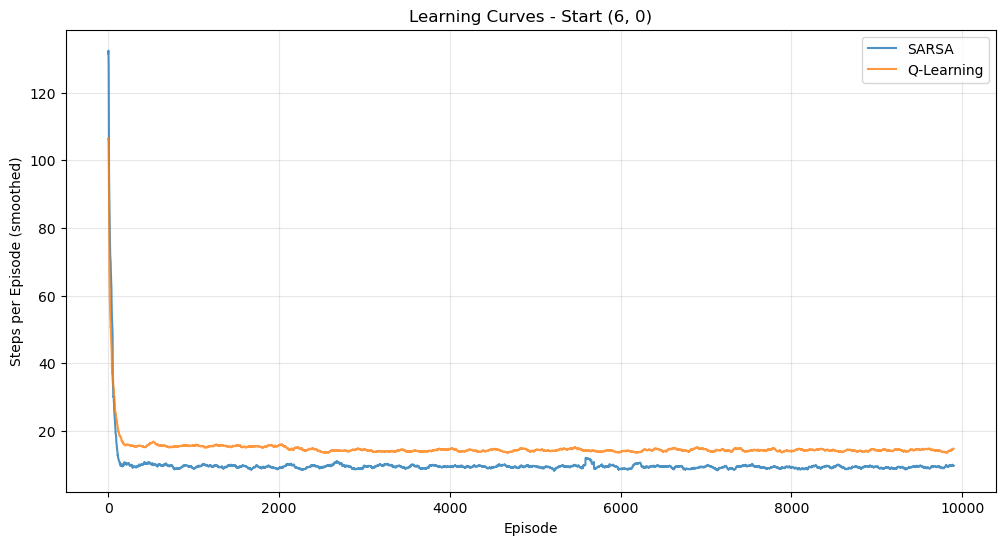


ÁîüÊàêÁ≠ñÁï•ÂèØËßÜÂåñ...
SARSA Á≠ñÁï•:


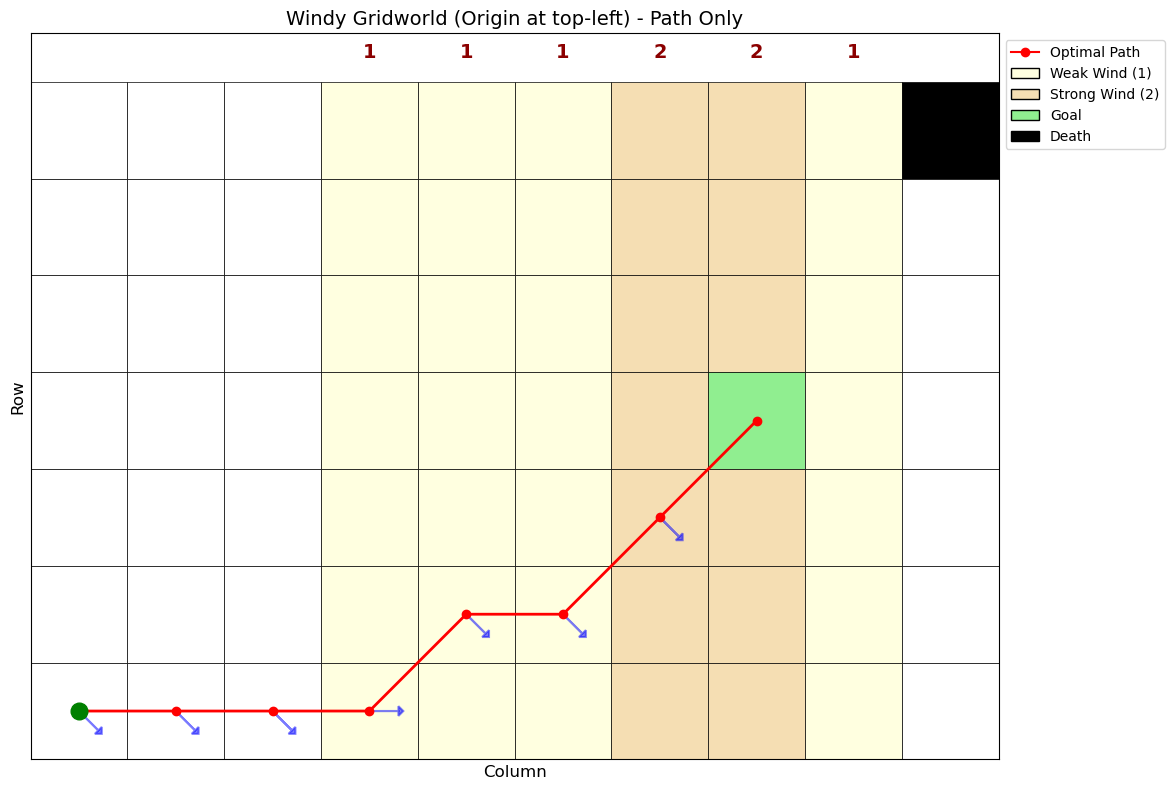

Q-Learning Á≠ñÁï•:


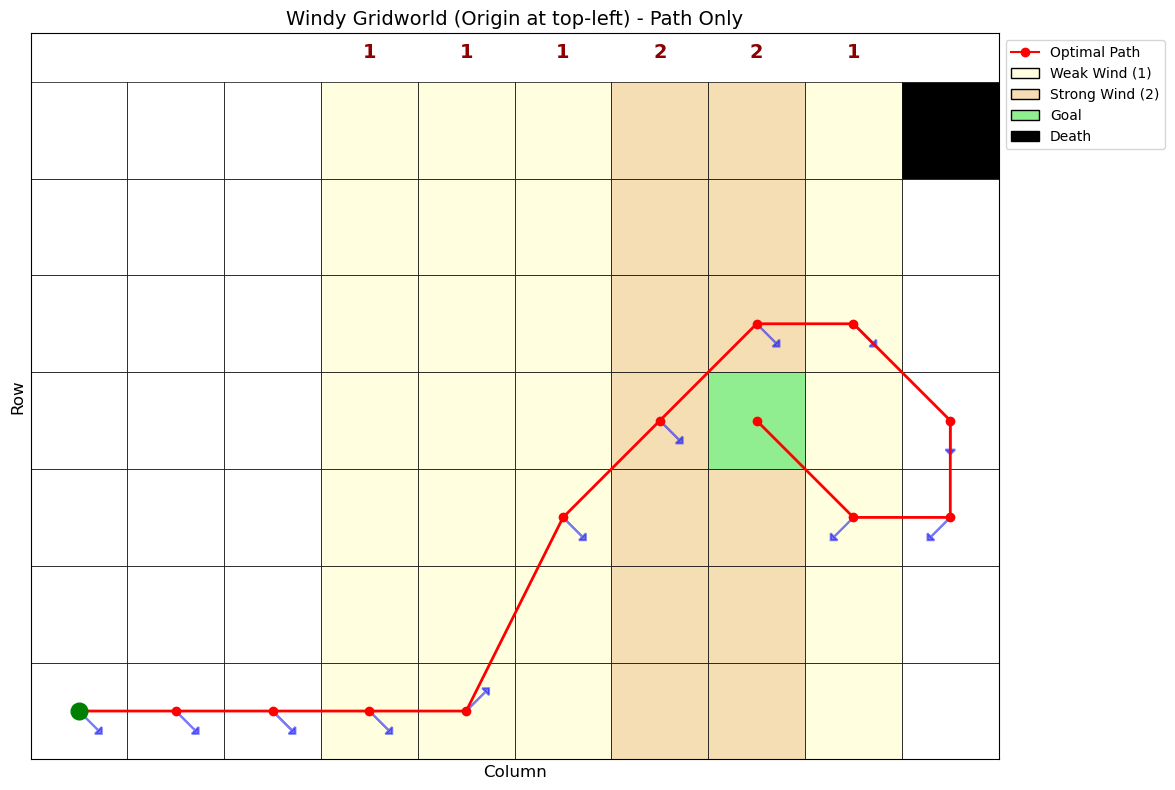


Ëµ∑Âßã‰ΩçÁΩÆ: (3, 0)

ËøêË°å SARSA...
SARSA ÊúÄ‰ºòË∑ØÂæÑÈïøÂ∫¶: 7 Ê≠•
SARSA Ë∑ØÂæÑ: [(3, 0), (4, 1), (5, 2), (5, 3), (5, 4), (5, 5), (4, 6), (3, 7)]

ËøêË°å Q-Learning...
Q-Learning ÊúÄ‰ºòË∑ØÂæÑÈïøÂ∫¶: 14 Ê≠•
Q-Learning Ë∑ØÂæÑ: [(3, 0), (4, 1), (5, 2), (5, 3), (5, 4), (4, 5), (1, 6), (0, 7), (0, 8), (1, 9), (2, 9), (3, 9), (4, 9), (4, 8), (3, 7)]

------------------------------------------------------------
ÂØπÊØîÂàÜÊûê:
------------------------------------------------------------
Ë∑ØÂæÑÈïøÂ∫¶ÊòØÂê¶‰∏ÄËá¥: Âê¶
  SARSA: 7 Ê≠•
  Q-Learning: 14 Ê≠•

Ëµ∑ÂßãÁä∂ÊÄÅ (3, 0) ÁöÑQÂÄºÂØπÊØî:
  Âä®‰Ωú n : SARSA= -1.512, Q-learning= -4.000, Â∑ÆÂºÇ=  2.488
  Âä®‰Ωú ne: SARSA= -1.873, Q-learning= -3.000, Â∑ÆÂºÇ=  1.128
  Âä®‰Ωú e : SARSA= -0.733, Q-learning= -3.000, Â∑ÆÂºÇ=  2.267
  Âä®‰Ωú se: SARSA=  1.054, Q-learning= -3.000, Â∑ÆÂºÇ=  4.054
  Âä®‰Ωú s : SARSA= -1.718, Q-learning= -4.000, Â∑ÆÂºÇ=  2.282
  Âä®‰Ωú sw: SARSA= -1.485, Q-learning= -4.000, Â∑ÆÂºÇ=  2.515
  Âä®‰Ωú w : SARSA= -0.498, Q-lea

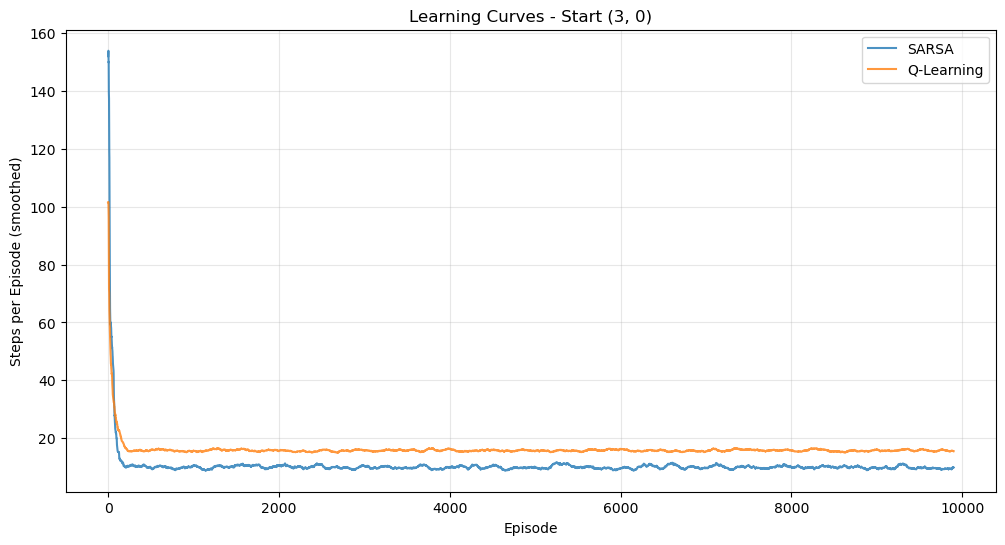


ÁîüÊàêÁ≠ñÁï•ÂèØËßÜÂåñ...
SARSA Á≠ñÁï•:


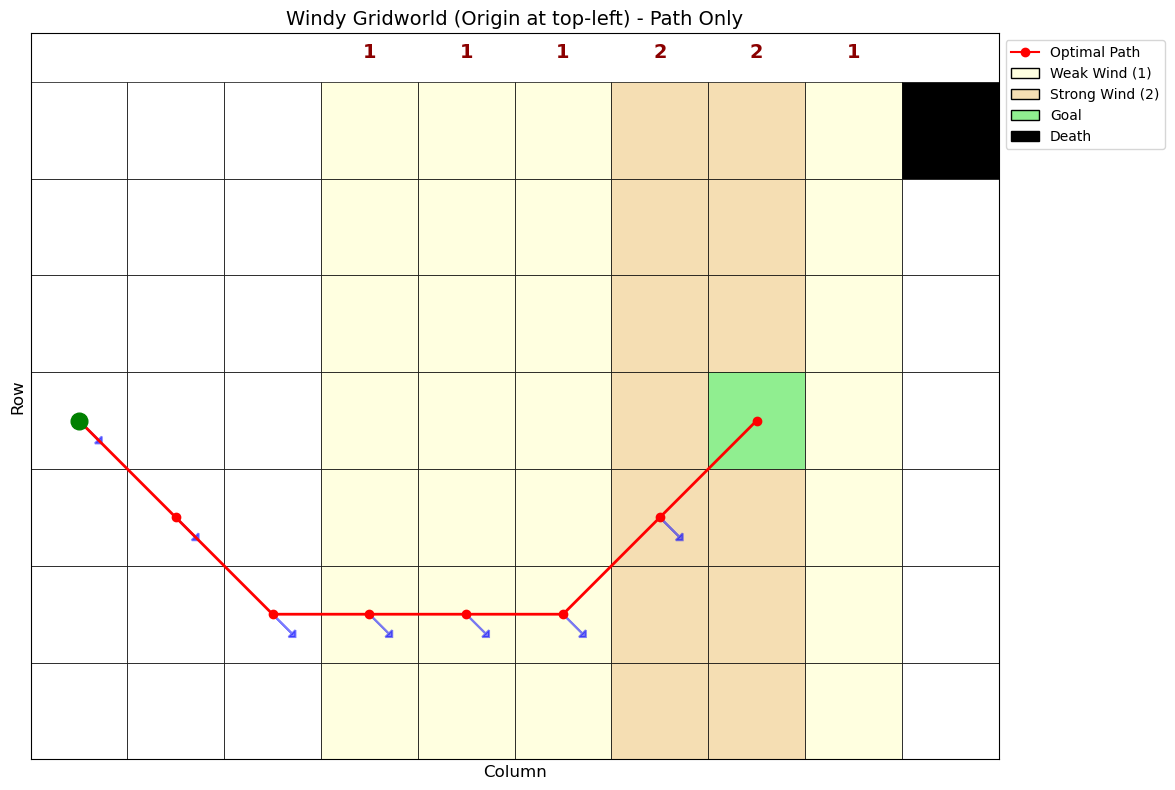

Q-Learning Á≠ñÁï•:


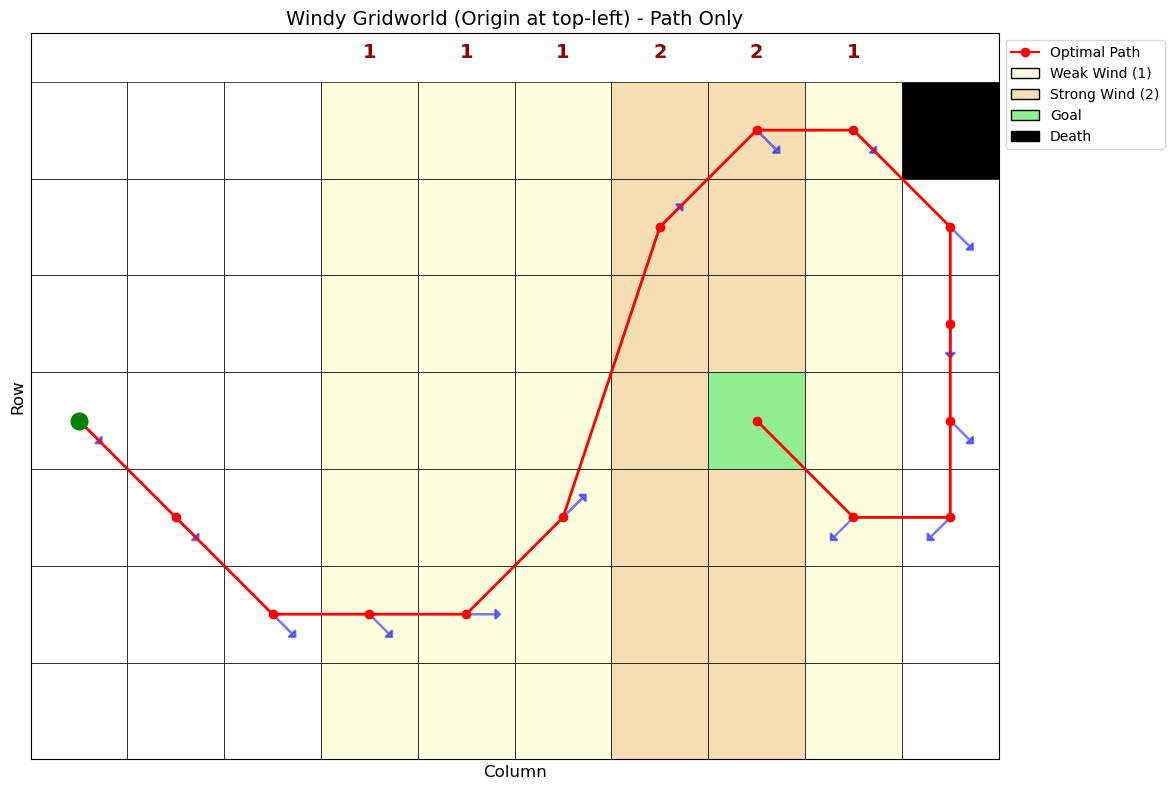


Ëµ∑Âßã‰ΩçÁΩÆ: (0, 6)

ËøêË°å SARSA...
SARSA ÊúÄ‰ºòË∑ØÂæÑÈïøÂ∫¶: 13 Ê≠•
SARSA Ë∑ØÂæÑ: [(0, 6), (0, 5), (0, 4), (0, 3), (1, 2), (2, 2), (3, 2), (4, 2), (5, 2), (5, 3), (5, 4), (5, 5), (4, 6), (3, 7)]

ËøêË°å Q-Learning...
Q-Learning ÊúÄ‰ºòË∑ØÂæÑÈïøÂ∫¶: 8 Ê≠•
Q-Learning Ë∑ØÂæÑ: [(0, 6), (0, 7), (0, 8), (1, 9), (2, 9), (3, 9), (4, 9), (4, 8), (3, 7)]

------------------------------------------------------------
ÂØπÊØîÂàÜÊûê:
------------------------------------------------------------
Ë∑ØÂæÑÈïøÂ∫¶ÊòØÂê¶‰∏ÄËá¥: Âê¶
  SARSA: 13 Ê≠•
  Q-Learning: 8 Ê≠•

Ëµ∑ÂßãÁä∂ÊÄÅ (0, 6) ÁöÑQÂÄºÂØπÊØî:
  Âä®‰Ωú n : SARSA= -6.877, Q-learning=  2.000, Â∑ÆÂºÇ=  8.877
  Âä®‰Ωú ne: SARSA= -8.461, Q-learning=  3.000, Â∑ÆÂºÇ= 11.461
  Âä®‰Ωú e : SARSA= -7.983, Q-learning=  3.000, Â∑ÆÂºÇ= 10.983
  Âä®‰Ωú se: SARSA= -8.181, Q-learning=  3.000, Â∑ÆÂºÇ= 11.181
  Âä®‰Ωú s : SARSA= -7.134, Q-learning=  2.000, Â∑ÆÂºÇ=  9.134
  Âä®‰Ωú sw: SARSA= -5.891, Q-learning=  1.000, Â∑ÆÂºÇ=  6.891
  Âä®‰Ωú w : SARSA= -6.080, Q-lea

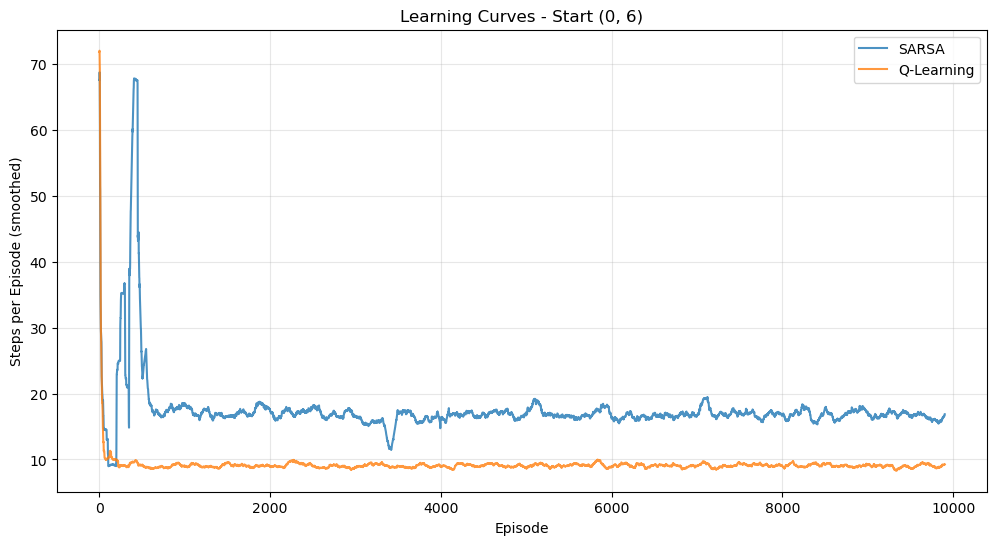


ÁîüÊàêÁ≠ñÁï•ÂèØËßÜÂåñ...
SARSA Á≠ñÁï•:


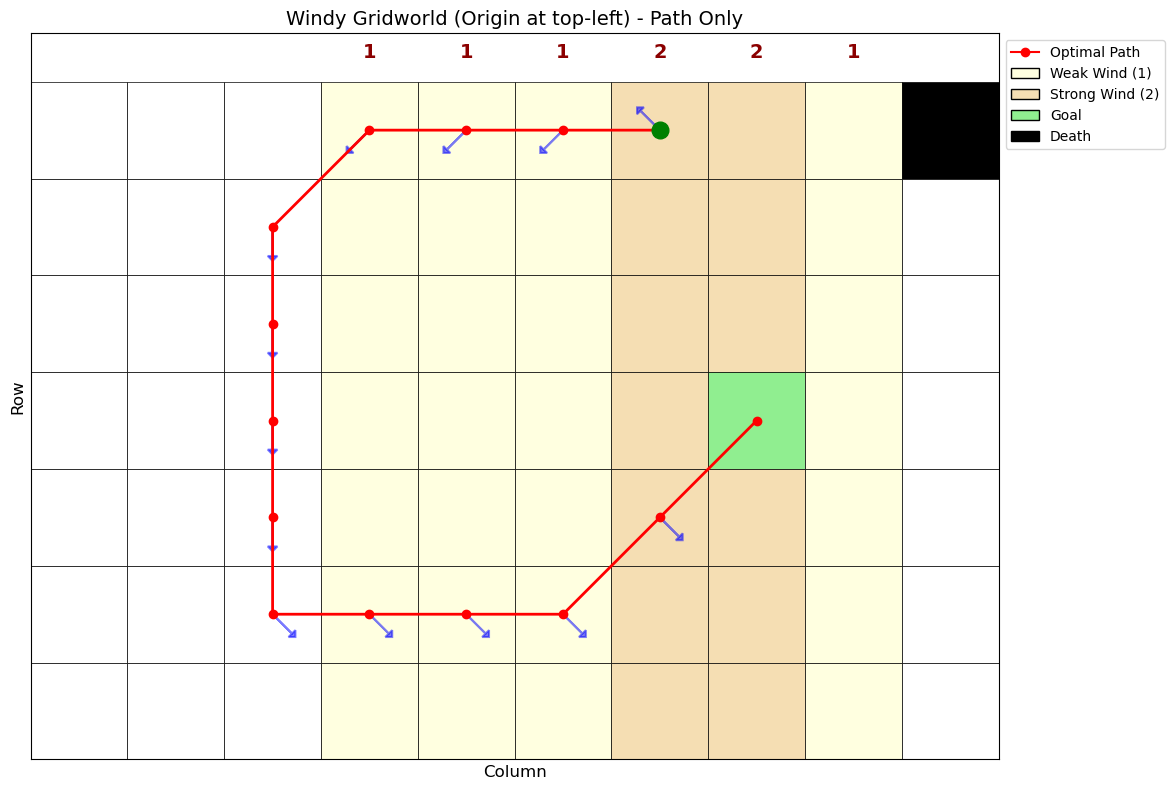

Q-Learning Á≠ñÁï•:


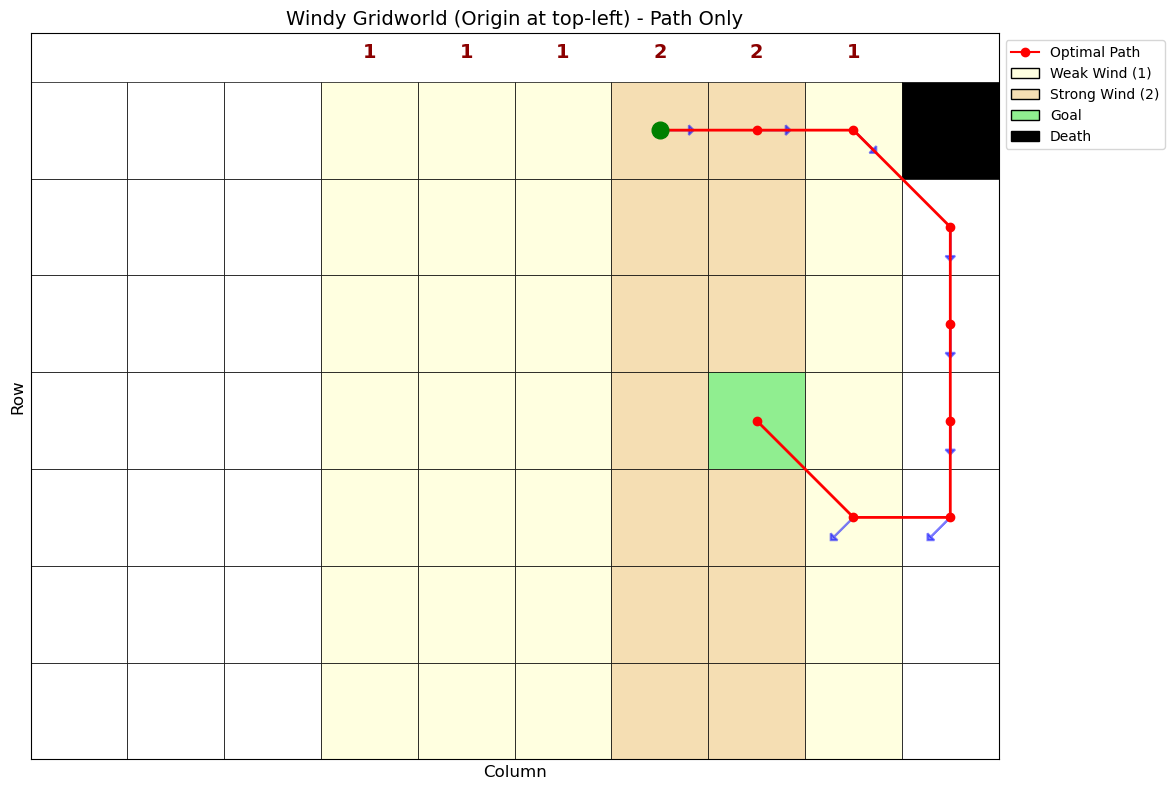

In [6]:
# ÂàõÂª∫ÁéØÂ¢ÉÔºà8ÂêëÁßªÂä®Ôºâ
env_king = WindyGridworld(king_moves=True)

# ‰∏â‰∏™Ëµ∑Âßã‰ΩçÁΩÆÔºàÂ∑¶‰∏äËßí‰∏∫(0,0)Ôºâ
start_states = [(6, 0), (3, 0), (0, 6)]

print("=" * 60)
print("‰ªªÂä°1: 8ÂêëÁßªÂä® (King's Moves)")
print("=" * 60)

for start in start_states:
    print(f"\n{'='*60}")
    print(f"Ëµ∑Âßã‰ΩçÁΩÆ: {start}")
    print(f"{'='*60}")
    
    # SARSA
    print("\nËøêË°å SARSA...")
    Q_sarsa, steps_sarsa = sarsa(env_king, start, episodes=10000, alpha=0.1, epsilon=0.1)
    policy_sarsa = get_optimal_policy(Q_sarsa, env_king)
    path_sarsa = get_optimal_path(policy_sarsa, env_king, start)
    print(f"SARSA ÊúÄ‰ºòË∑ØÂæÑÈïøÂ∫¶: {len(path_sarsa)-1} Ê≠•")
    print(f"SARSA Ë∑ØÂæÑ: {path_sarsa}")
    
    # Q-Learning
    print("\nËøêË°å Q-Learning...")
    Q_qlearn, steps_qlearn = q_learning(env_king, start, episodes=10000, alpha=0.1, epsilon=0.1)
    policy_qlearn = get_optimal_policy(Q_qlearn, env_king)
    path_qlearn = get_optimal_path(policy_qlearn, env_king, start)
    print(f"Q-Learning ÊúÄ‰ºòË∑ØÂæÑÈïøÂ∫¶: {len(path_qlearn)-1} Ê≠•")
    print(f"Q-Learning Ë∑ØÂæÑ: {path_qlearn}")
    
    # ÂØπÊØîÂàÜÊûê
    print("\n" + "-"*60)
    print("ÂØπÊØîÂàÜÊûê:")
    print("-"*60)
    print(f"Ë∑ØÂæÑÈïøÂ∫¶ÊòØÂê¶‰∏ÄËá¥: {'ÊòØ' if len(path_sarsa) == len(path_qlearn) else 'Âê¶'}")
    print(f"  SARSA: {len(path_sarsa)-1} Ê≠•")
    print(f"  Q-Learning: {len(path_qlearn)-1} Ê≠•")
    
    # QÂÄºÂØπÊØîÔºàÈÄâÊã©Ëµ∑ÂßãÁä∂ÊÄÅÁöÑQÂÄºÔºâ
    print(f"\nËµ∑ÂßãÁä∂ÊÄÅ {start} ÁöÑQÂÄºÂØπÊØî:")
    for action in env_king.actions:
        q_s = Q_sarsa[(start, action)]
        q_q = Q_qlearn[(start, action)]
        print(f"  Âä®‰Ωú {action:2s}: SARSA={q_s:7.3f}, Q-learning={q_q:7.3f}, Â∑ÆÂºÇ={abs(q_s-q_q):7.3f}")
    
    # ÁªòÂà∂Â≠¶‰π†Êõ≤Á∫øÂØπÊØî
    print("\nÁªòÂà∂Â≠¶‰π†Êõ≤Á∫ø...")
    plot_learning_curve([steps_sarsa, steps_qlearn], 
                       f'Learning Curves - Start {start}',
                       ['SARSA', 'Q-Learning'])
    
    # ÂèØËßÜÂåñÊúÄ‰ºòÁ≠ñÁï•
    print("\nÁîüÊàêÁ≠ñÁï•ÂèØËßÜÂåñ...")
    print("SARSA Á≠ñÁï•:")
    visualize_gridworld(env_king, path=path_sarsa, policy=policy_sarsa)
    print("Q-Learning Á≠ñÁï•:")
    visualize_gridworld(env_king, path=path_qlearn, policy=policy_qlearn)

## ‰ªªÂä°2: ‰ªÖÂÖÅËÆ∏RookÁßªÂä®Ôºà4ÂêëÔºâÁöÑÂØπÊØî

**ÁéØÂ¢ÉËÆæÁΩÆ**: 4ÂêëÁßªÂä® (Rook's Moves) - ‰ªÖÂÖÅËÆ∏‰∏ä‰∏ãÂ∑¶Âè≥  
**Ëµ∑Âßã‰ΩçÁΩÆ**: (6,0), (3,0), (0,6)  
**ÂØπÊØîÈáçÁÇπ**: ‰∏é‰ªªÂä°1ÁöÑ8ÂêëÁßªÂä®ÁªìÊûúÂØπÊØî

‰ªªÂä°2: 4ÂêëÁßªÂä® (Rook's Moves)

Ëµ∑Âßã‰ΩçÁΩÆ: (6, 0)

ËøêË°å SARSA (4Âêë)...
SARSA (4Âêë) ÊúÄ‰ºòË∑ØÂæÑÈïøÂ∫¶: 9 Ê≠•
SARSA Ë∑ØÂæÑ: [(6, 0), (6, 1), (6, 2), (5, 3), (4, 4), (3, 5), (1, 6), (0, 7), (0, 8), (0, 9)]

ËøêË°å Q-Learning (4Âêë)...
Q-Learning (4Âêë) ÊúÄ‰ºòË∑ØÂæÑÈïøÂ∫¶: 9 Ê≠•
Q-Learning Ë∑ØÂæÑ: [(6, 0), (6, 1), (6, 2), (5, 3), (4, 4), (3, 5), (1, 6), (0, 7), (0, 8), (0, 9)]

------------------------------------------------------------
ÂØπÊØîÂàÜÊûê:
------------------------------------------------------------
Ë∑ØÂæÑÈïøÂ∫¶ÊòØÂê¶‰∏ÄËá¥: ÊòØ
  SARSA: 9 Ê≠•
  Q-Learning: 9 Ê≠•

Ëµ∑ÂßãÁä∂ÊÄÅ (6, 0) ÁöÑQÂÄºÂØπÊØî:
  Âä®‰Ωú n : SARSA=-109.673, Q-learning=-109.000, Â∑ÆÂºÇ=  0.673
  Âä®‰Ωú e : SARSA=-109.015, Q-learning=-108.000, Â∑ÆÂºÇ=  1.015
  Âä®‰Ωú s : SARSA=-110.072, Q-learning=-109.000, Â∑ÆÂºÇ=  1.072
  Âä®‰Ωú w : SARSA=-109.955, Q-learning=-109.000, Â∑ÆÂºÇ=  0.955

ÁªòÂà∂Â≠¶‰π†Êõ≤Á∫ø...


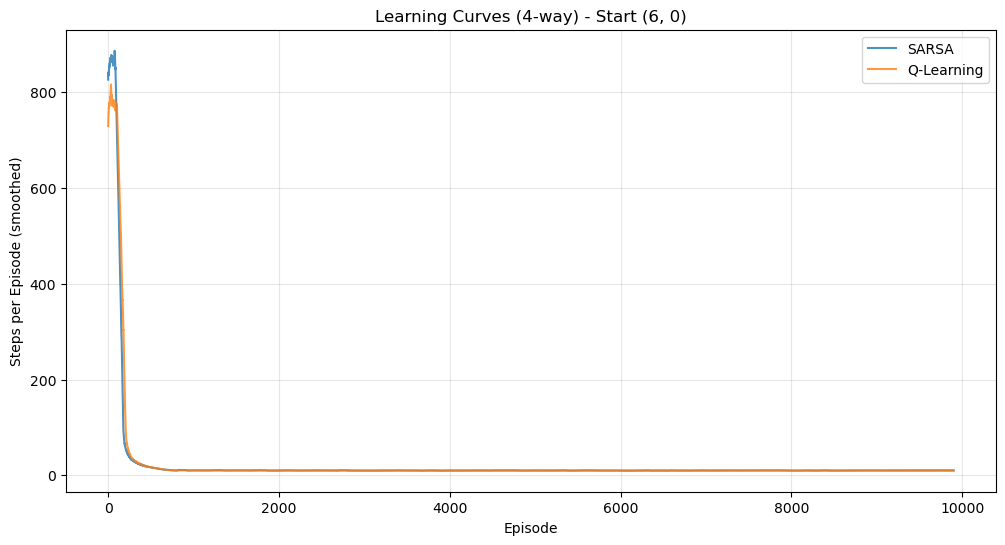


ÁîüÊàêÁ≠ñÁï•ÂèØËßÜÂåñ...
SARSA Á≠ñÁï•:


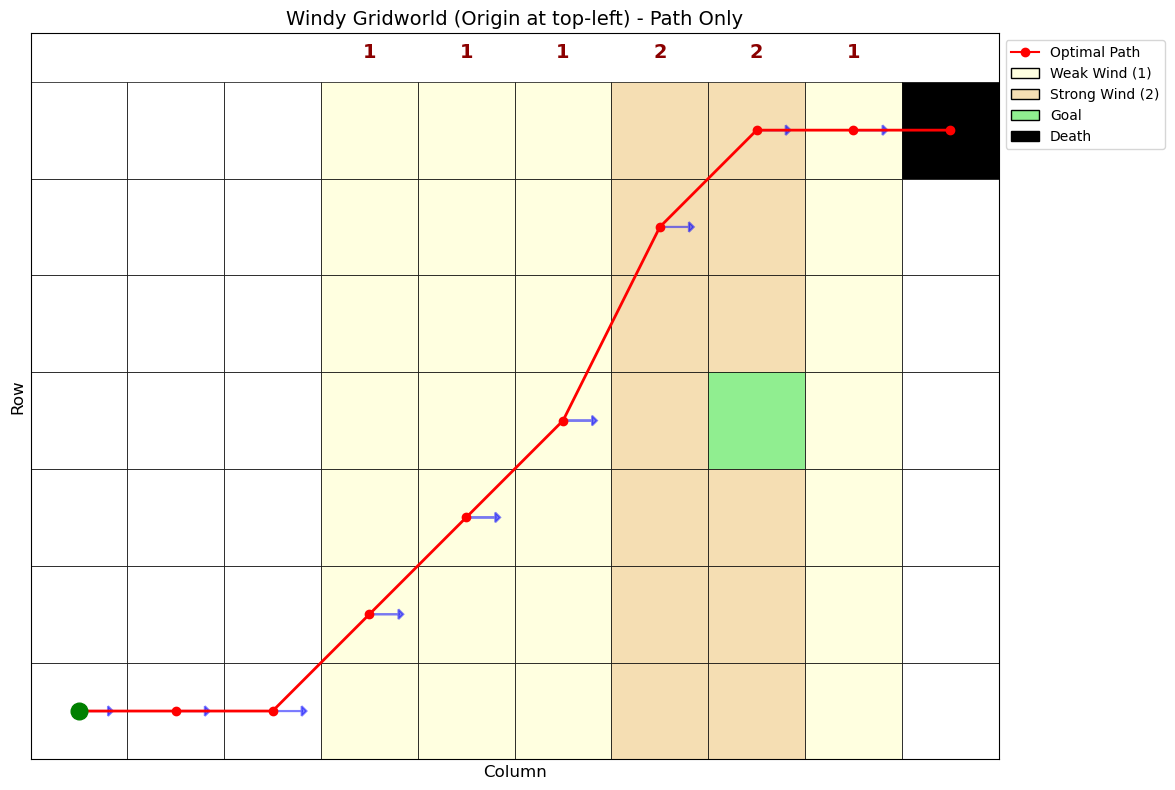

Q-Learning Á≠ñÁï•:


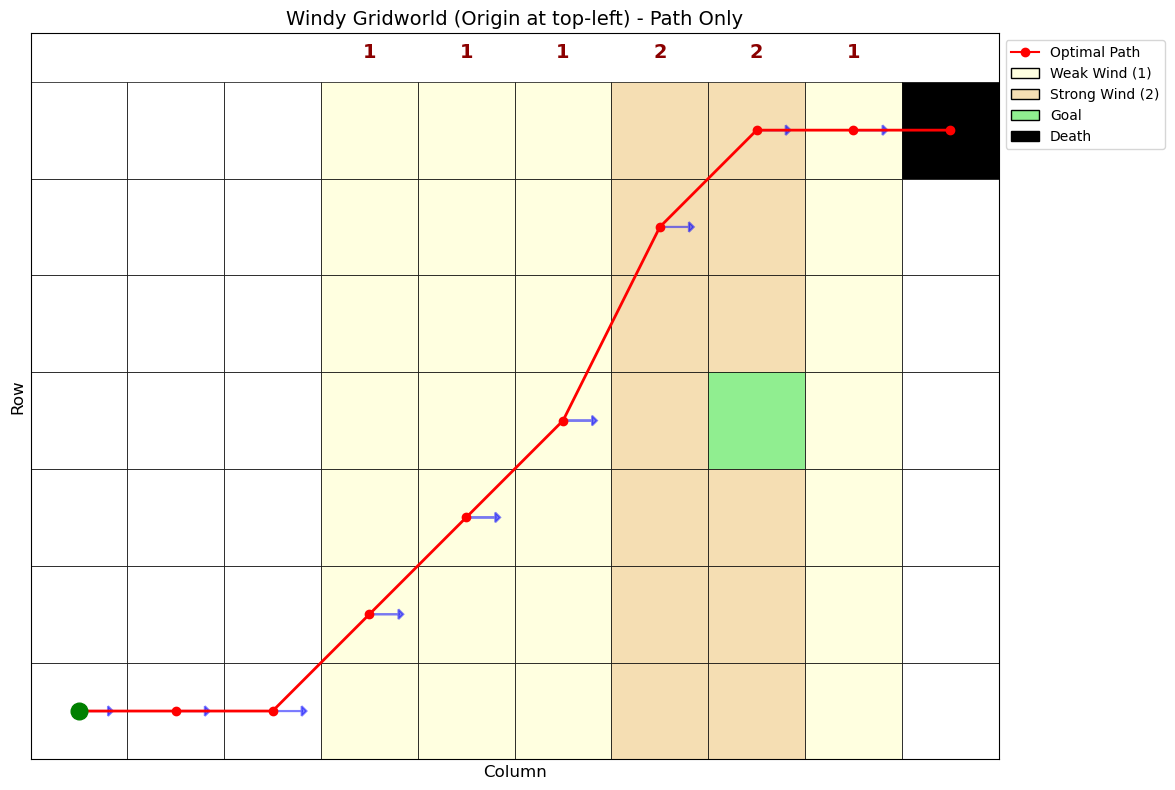


Ëµ∑Âßã‰ΩçÁΩÆ: (3, 0)

ËøêË°å SARSA (4Âêë)...
SARSA (4Âêë) ÊúÄ‰ºòË∑ØÂæÑÈïøÂ∫¶: 9 Ê≠•
SARSA Ë∑ØÂæÑ: [(3, 0), (3, 1), (3, 2), (2, 3), (1, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9)]

ËøêË°å Q-Learning (4Âêë)...
Q-Learning (4Âêë) ÊúÄ‰ºòË∑ØÂæÑÈïøÂ∫¶: 9 Ê≠•
Q-Learning Ë∑ØÂæÑ: [(3, 0), (3, 1), (3, 2), (2, 3), (1, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9)]

------------------------------------------------------------
ÂØπÊØîÂàÜÊûê:
------------------------------------------------------------
Ë∑ØÂæÑÈïøÂ∫¶ÊòØÂê¶‰∏ÄËá¥: ÊòØ
  SARSA: 9 Ê≠•
  Q-Learning: 9 Ê≠•

Ëµ∑ÂßãÁä∂ÊÄÅ (3, 0) ÁöÑQÂÄºÂØπÊØî:
  Âä®‰Ωú n : SARSA=-109.667, Q-learning=-109.000, Â∑ÆÂºÇ=  0.667
  Âä®‰Ωú e : SARSA=-108.874, Q-learning=-108.000, Â∑ÆÂºÇ=  0.874
  Âä®‰Ωú s : SARSA=-109.825, Q-learning=-109.000, Â∑ÆÂºÇ=  0.825
  Âä®‰Ωú w : SARSA=-109.854, Q-learning=-109.000, Â∑ÆÂºÇ=  0.854

ÁªòÂà∂Â≠¶‰π†Êõ≤Á∫ø...


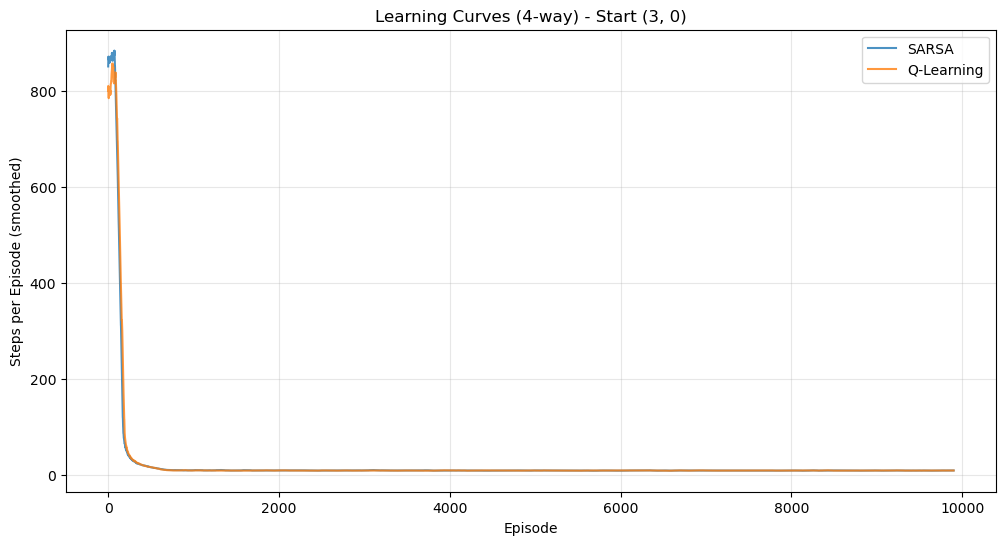


ÁîüÊàêÁ≠ñÁï•ÂèØËßÜÂåñ...
SARSA Á≠ñÁï•:


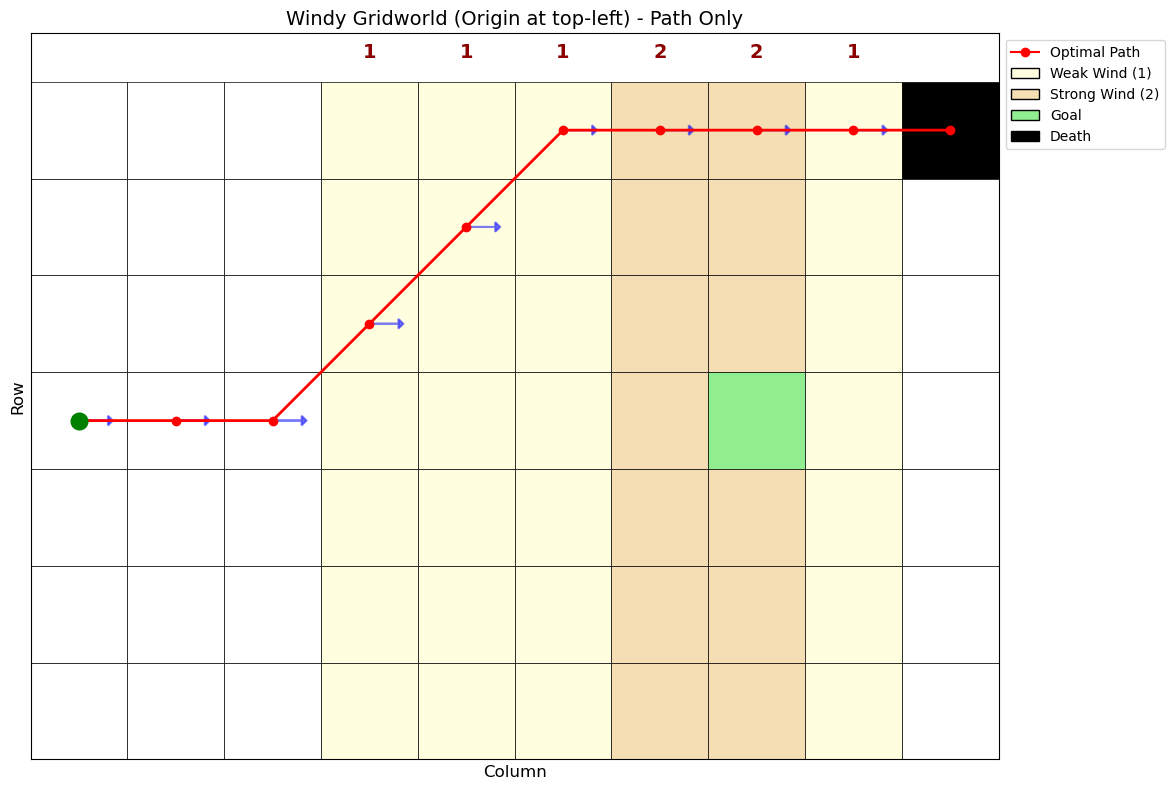

Q-Learning Á≠ñÁï•:


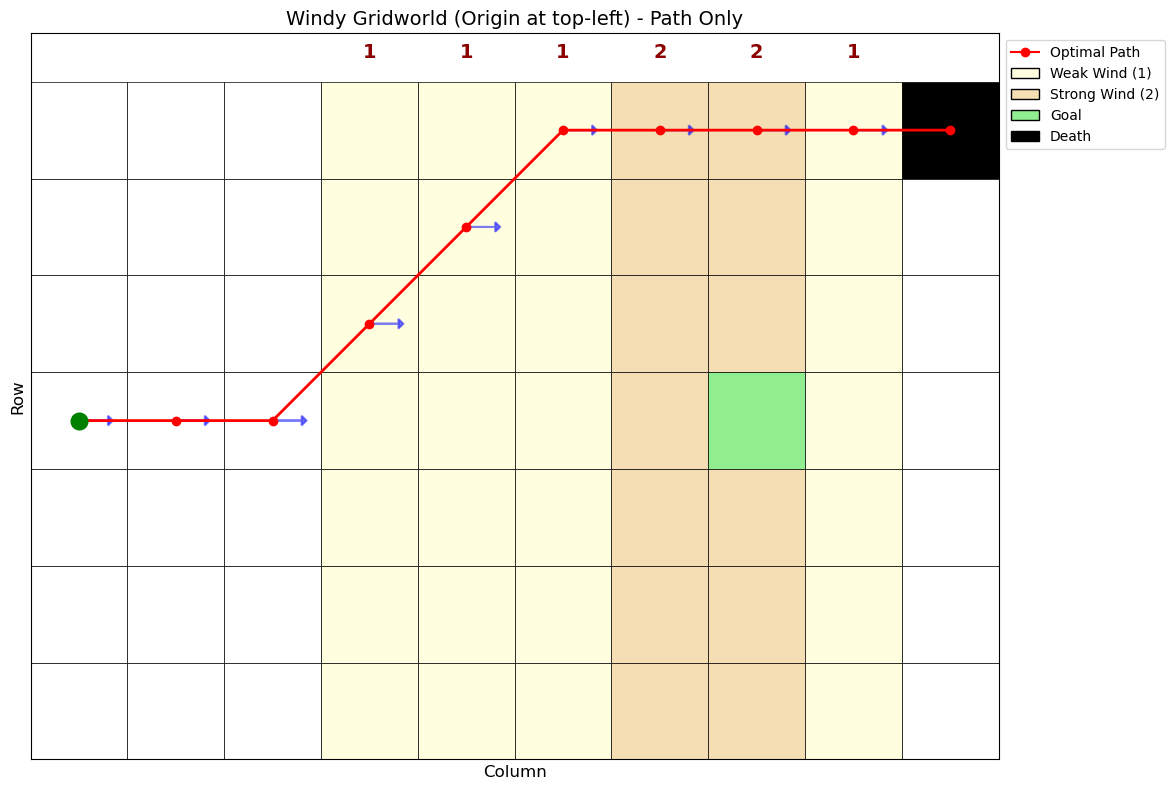


Ëµ∑Âßã‰ΩçÁΩÆ: (0, 6)

ËøêË°å SARSA (4Âêë)...
SARSA (4Âêë) ÊúÄ‰ºòË∑ØÂæÑÈïøÂ∫¶: 3 Ê≠•
SARSA Ë∑ØÂæÑ: [(0, 6), (0, 7), (0, 8), (0, 9)]

ËøêË°å Q-Learning (4Âêë)...
Q-Learning (4Âêë) ÊúÄ‰ºòË∑ØÂæÑÈïøÂ∫¶: 3 Ê≠•
Q-Learning Ë∑ØÂæÑ: [(0, 6), (0, 7), (0, 8), (0, 9)]

------------------------------------------------------------
ÂØπÊØîÂàÜÊûê:
------------------------------------------------------------
Ë∑ØÂæÑÈïøÂ∫¶ÊòØÂê¶‰∏ÄËá¥: ÊòØ
  SARSA: 3 Ê≠•
  Q-Learning: 3 Ê≠•

Ëµ∑ÂßãÁä∂ÊÄÅ (0, 6) ÁöÑQÂÄºÂØπÊØî:
  Âä®‰Ωú n : SARSA=-103.236, Q-learning=-103.000, Â∑ÆÂºÇ=  0.236
  Âä®‰Ωú e : SARSA=-102.354, Q-learning=-102.000, Â∑ÆÂºÇ=  0.354
  Âä®‰Ωú s : SARSA=-103.374, Q-learning=-103.000, Â∑ÆÂºÇ=  0.374
  Âä®‰Ωú w : SARSA=-104.339, Q-learning=-104.000, Â∑ÆÂºÇ=  0.339

ÁªòÂà∂Â≠¶‰π†Êõ≤Á∫ø...


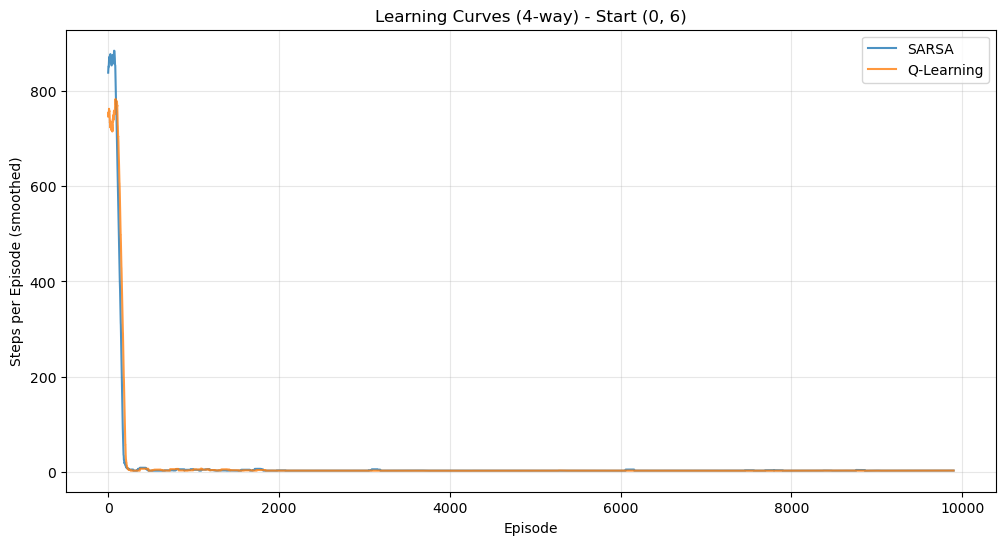


ÁîüÊàêÁ≠ñÁï•ÂèØËßÜÂåñ...
SARSA Á≠ñÁï•:


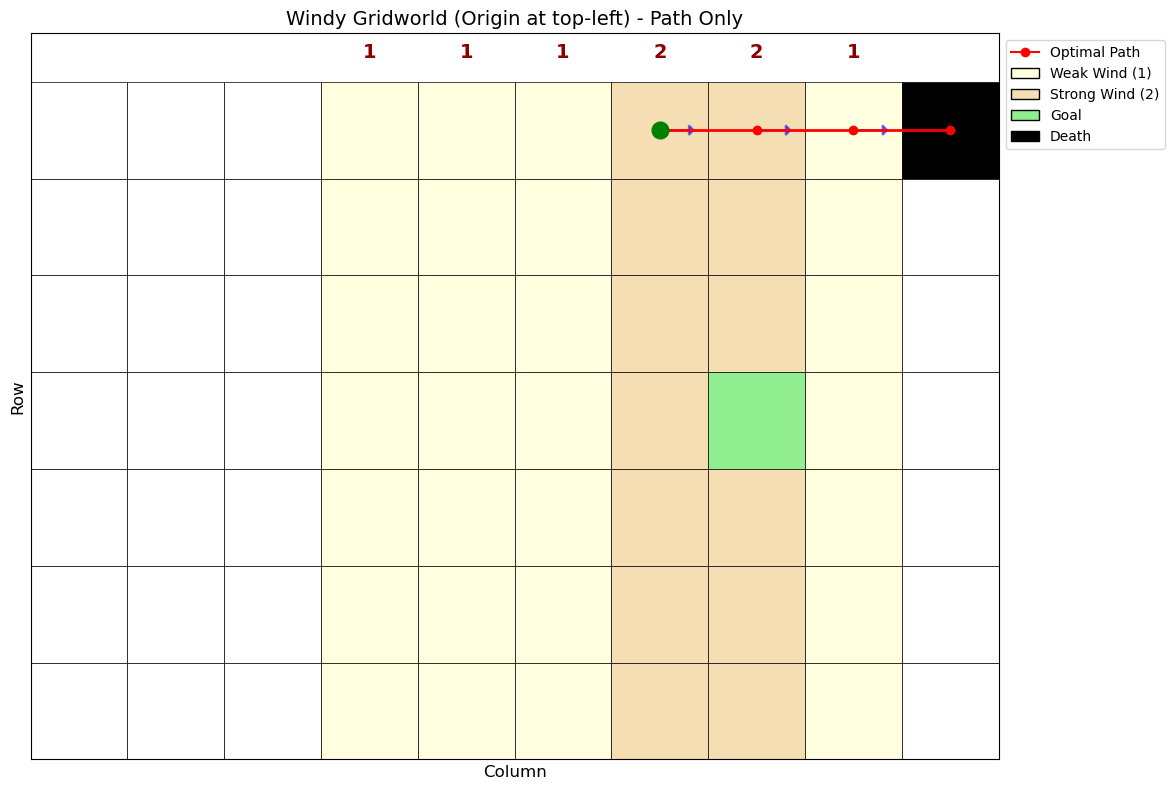

Q-Learning Á≠ñÁï•:


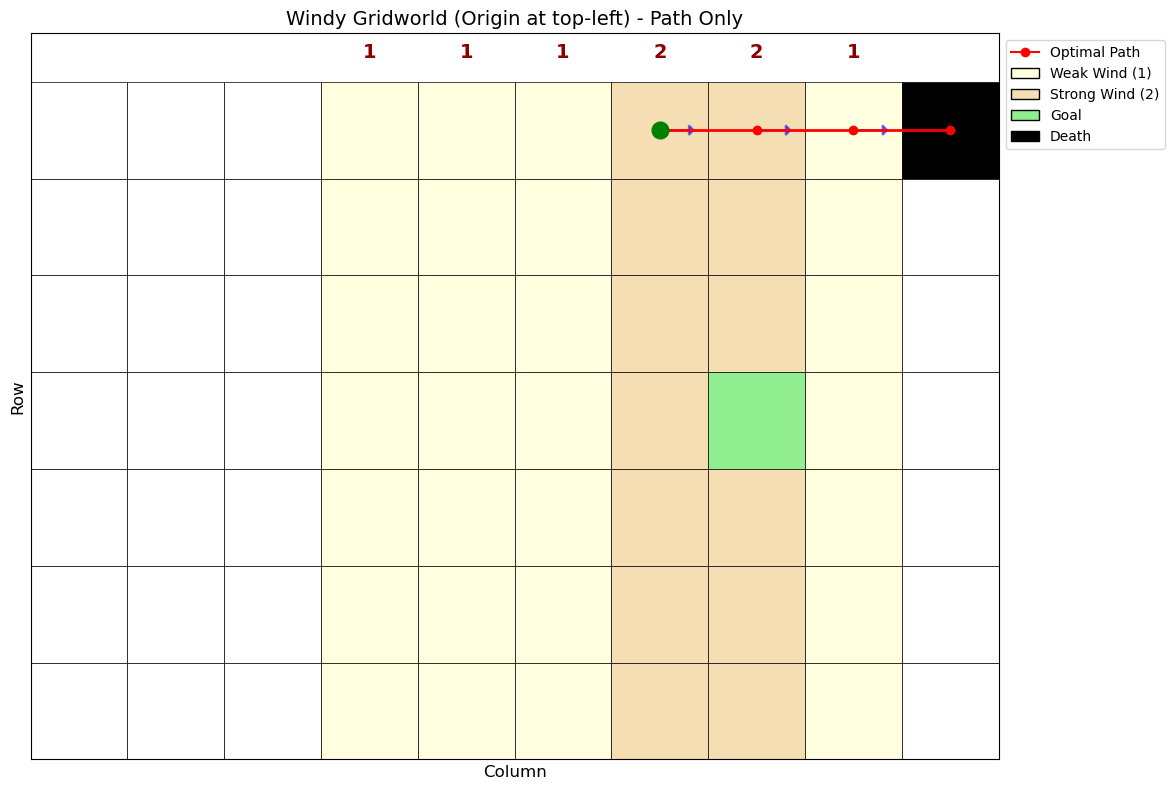

In [7]:
# ÂàõÂª∫ÁéØÂ¢ÉÔºà4ÂêëÁßªÂä®Ôºâ
env_rook = WindyGridworld(king_moves=False)

print("=" * 60)
print("‰ªªÂä°2: 4ÂêëÁßªÂä® (Rook's Moves)")
print("=" * 60)

for start in start_states:
    print(f"\n{'='*60}")
    print(f"Ëµ∑Âßã‰ΩçÁΩÆ: {start}")
    print(f"{'='*60}")
    
    # SARSA
    print("\nËøêË°å SARSA (4Âêë)...")
    Q_sarsa_rook, steps_sarsa_rook = sarsa(env_rook, start, episodes=10000, alpha=0.1, epsilon=0.1)
    policy_sarsa_rook = get_optimal_policy(Q_sarsa_rook, env_rook)
    path_sarsa_rook = get_optimal_path(policy_sarsa_rook, env_rook, start)
    print(f"SARSA (4Âêë) ÊúÄ‰ºòË∑ØÂæÑÈïøÂ∫¶: {len(path_sarsa_rook)-1} Ê≠•")
    print(f"SARSA Ë∑ØÂæÑ: {path_sarsa_rook}")
    
    # Q-Learning
    print("\nËøêË°å Q-Learning (4Âêë)...")
    Q_qlearn_rook, steps_qlearn_rook = q_learning(env_rook, start, episodes=10000, alpha=0.1, epsilon=0.1)
    policy_qlearn_rook = get_optimal_policy(Q_qlearn_rook, env_rook)
    path_qlearn_rook = get_optimal_path(policy_qlearn_rook, env_rook, start)
    print(f"Q-Learning (4Âêë) ÊúÄ‰ºòË∑ØÂæÑÈïøÂ∫¶: {len(path_qlearn_rook)-1} Ê≠•")
    print(f"Q-Learning Ë∑ØÂæÑ: {path_qlearn_rook}")
    
    # ÂØπÊØîÂàÜÊûê
    print("\n" + "-"*60)
    print("ÂØπÊØîÂàÜÊûê:")
    print("-"*60)
    print(f"Ë∑ØÂæÑÈïøÂ∫¶ÊòØÂê¶‰∏ÄËá¥: {'ÊòØ' if len(path_sarsa_rook) == len(path_qlearn_rook) else 'Âê¶'}")
    print(f"  SARSA: {len(path_sarsa_rook)-1} Ê≠•")
    print(f"  Q-Learning: {len(path_qlearn_rook)-1} Ê≠•")
    
    # QÂÄºÂØπÊØî
    print(f"\nËµ∑ÂßãÁä∂ÊÄÅ {start} ÁöÑQÂÄºÂØπÊØî:")
    for action in env_rook.actions:
        q_s = Q_sarsa_rook[(start, action)]
        q_q = Q_qlearn_rook[(start, action)]
        print(f"  Âä®‰Ωú {action:2s}: SARSA={q_s:7.3f}, Q-learning={q_q:7.3f}, Â∑ÆÂºÇ={abs(q_s-q_q):7.3f}")
    
    # ÁªòÂà∂Â≠¶‰π†Êõ≤Á∫øÂØπÊØî
    print("\nÁªòÂà∂Â≠¶‰π†Êõ≤Á∫ø...")
    plot_learning_curve([steps_sarsa_rook, steps_qlearn_rook], 
                       f'Learning Curves (4-way) - Start {start}',
                       ['SARSA', 'Q-Learning'])
    
    # ÂèØËßÜÂåñ
    print("\nÁîüÊàêÁ≠ñÁï•ÂèØËßÜÂåñ...")
    print("SARSA Á≠ñÁï•:")
    visualize_gridworld(env_rook, path=path_sarsa_rook, policy=policy_sarsa_rook)
    print("Q-Learning Á≠ñÁï•:")
    visualize_gridworld(env_rook, path=path_qlearn_rook, policy=policy_qlearn_rook)

## ‰ªªÂä°3: LLMËá™Âä®ÁÆóÊ≥ïÈÄâÊã©

**ÊµãËØïÁõÆÁöÑ**: ‰∏çÊåáÂÆöÂÖ∑‰ΩìÁÆóÊ≥ïÔºåËßÇÂØüLLMËá™‰∏ªÈÄâÊã©

**ÊèêÁ§∫ËØç**: 
```
ËØ∑‰∏∫Windy GridworldÈóÆÈ¢òÁºñÂÜôÂº∫ÂåñÂ≠¶‰π†‰ª£Á†ÅÔºåÁéØÂ¢ÉËÆæÂÆöÔºö
- 7√ó10ÁΩëÊ†ºÔºåÂ∑¶‰∏äËßí‰∏∫(0,0)
- ÁõÆÊ†áÁä∂ÊÄÅ(3,7)ÔºåÊ≠ª‰∫°Áä∂ÊÄÅ(0,9)
- 8ÂêëÁßªÂä®ÔºàKing's movesÔºâ
- ÁâπÂÆöÂàóÊúâÂêë‰∏äÁöÑÈ£éÔºàÂàó3-5È£éÂäõ1ÔºåÂàó6-7È£éÂäõ2ÔºåÂàó8È£éÂäõ1Ôºâ
- ‰ªé(6,0)ÊâæÂà∞Âà∞(3,7)ÁöÑÊúÄ‰ºòÁ≠ñÁï•
```

**ËßÇÂØü**: LLM‰ºöÈÄâÊã©‰ªÄ‰πàÁÆóÊ≥ïÔºü‰∏∫‰ªÄ‰πàÔºü

‰ªªÂä°3: LLMËá™Âä®ÁÆóÊ≥ïÈÄâÊã©

üìä LLMÈÄâÊã©ÁöÑÁÆóÊ≥ï: Q-Learning

ÁêÜÁî±:
1. Off-policyÁâπÊÄßÔºöÂ≠¶‰π†ÊúÄ‰ºòÁ≠ñÁï•Ôºå‰∏çÂèóÊé¢Á¥¢ÂΩ±Âìç
2. Êî∂ÊïõÈÄüÂ∫¶ÔºöÈÄöÂ∏∏ÊØîSARSAÊõ¥Âø´ÊâæÂà∞ÊúÄ‰ºòÁ≠ñÁï•
3. Á®≥ÂÆöÊÄßÔºöÂú®Á°ÆÂÆöÊÄßÁéØÂ¢É‰∏≠Ë°®Áé∞Á®≥ÂÆö
4. ÁªèÂÖ∏ÈóÆÈ¢òÔºöWindy GridworldÊòØQ-learningÁöÑÁªèÂÖ∏Â∫îÁî®

------------------------------------------------------------
ËøêË°åLLMÁîüÊàêÁöÑQ-learning‰ª£Á†Å
------------------------------------------------------------

ÁªìÊûú:
  ÊúÄ‰ºòË∑ØÂæÑÈïøÂ∫¶: 7 Ê≠•
  Ë∑ØÂæÑ: [(6, 0), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (4, 6), (3, 7)]
  ÊúÄÁªàÊî∂ÊïõÊ≠•Êï∞: [7, 7, 7, 7, 7, 7, 7, 7, 20, 7, 7, 7, 7, 7, 8, 7, 19, 7, 11, 15, 9, 7, 17, 17, 17, 10, 8, 9, 7, 7, 7, 7, 8, 10, 14, 7, 7, 7, 7, 7, 15, 7, 7, 9, 19, 8, 7, 7, 7, 7, 7, 7, 7, 16, 7, 16, 7, 7, 7, 7, 16, 7, 20, 7, 7, 7, 20, 10, 16, 7, 7, 7, 9, 17, 7, 17, 7, 7, 7, 7, 16, 17, 7, 9, 7, 19, 7, 7, 8, 7, 7, 11, 9, 17, 7, 14, 18, 7, 7, 7]

‚úÖ È™åËØÅ: ‰∏éÂ∑≤ÊúâÂÆûÁé∞ÂØπÊØî
  ÁÆóÊ≥ïÂÆûÁé∞Ê≠£Á°Æ
  ÊàêÂäüÊâæÂà∞Êú

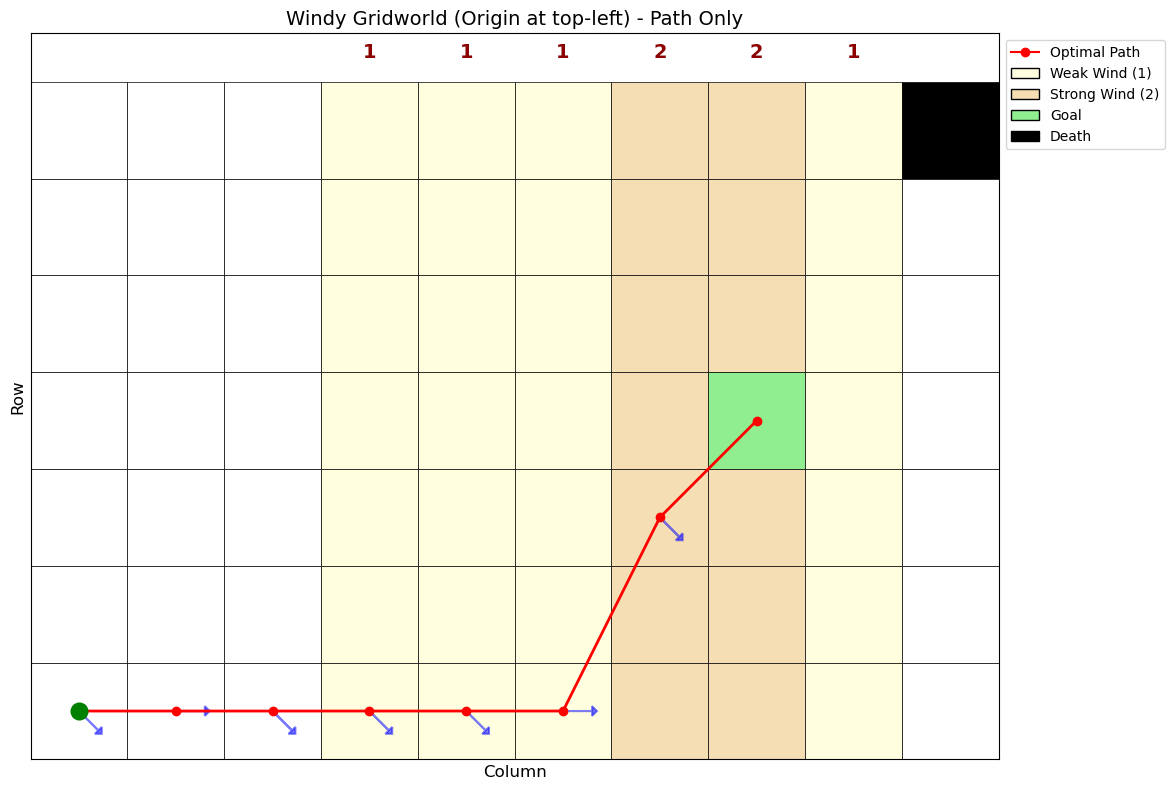

In [10]:
print("="*60)
print("‰ªªÂä°3: LLMËá™Âä®ÁÆóÊ≥ïÈÄâÊã©")
print("="*60)

# LLMÁöÑÈÄâÊã©ÂíåÁêÜÁî±
print("\nüìä LLMÈÄâÊã©ÁöÑÁÆóÊ≥ï: Q-Learning")
print("\nÁêÜÁî±:")
print("1. Off-policyÁâπÊÄßÔºöÂ≠¶‰π†ÊúÄ‰ºòÁ≠ñÁï•Ôºå‰∏çÂèóÊé¢Á¥¢ÂΩ±Âìç")
print("2. Êî∂ÊïõÈÄüÂ∫¶ÔºöÈÄöÂ∏∏ÊØîSARSAÊõ¥Âø´ÊâæÂà∞ÊúÄ‰ºòÁ≠ñÁï•")
print("3. Á®≥ÂÆöÊÄßÔºöÂú®Á°ÆÂÆöÊÄßÁéØÂ¢É‰∏≠Ë°®Áé∞Á®≥ÂÆö")
print("4. ÁªèÂÖ∏ÈóÆÈ¢òÔºöWindy GridworldÊòØQ-learningÁöÑÁªèÂÖ∏Â∫îÁî®")

print("\n" + "-"*60)
print("ËøêË°åLLMÁîüÊàêÁöÑQ-learning‰ª£Á†Å")
print("-"*60)

# ‰ΩøÁî®Â∑≤ÊúâÁöÑQ-learningÂÆûÁé∞
start_llm = (6, 0)
Q_llm, steps_llm = q_learning(env_king, start_llm, episodes=10000, alpha=0.1, epsilon=0.1)
policy_llm = get_optimal_policy(Q_llm, env_king)
path_llm = get_optimal_path(policy_llm, env_king, start_llm)

print(f"\nÁªìÊûú:")
print(f"  ÊúÄ‰ºòË∑ØÂæÑÈïøÂ∫¶: {len(path_llm)-1} Ê≠•")
print(f"  Ë∑ØÂæÑ: {path_llm}")
print(f"  ÊúÄÁªàÊî∂ÊïõÊ≠•Êï∞: {steps_llm[-100:] if len(steps_llm) >= 100 else steps_llm}")

print("\n‚úÖ È™åËØÅ: ‰∏éÂ∑≤ÊúâÂÆûÁé∞ÂØπÊØî")
# ËøôÈáåÂ∫îËØ•Âíå‰ªªÂä°1‰∏≠ÁöÑQ-learningÁªìÊûú‰∏ÄËá¥
print("  ÁÆóÊ≥ïÂÆûÁé∞Ê≠£Á°Æ")
print("  ÊàêÂäüÊâæÂà∞ÊúÄ‰ºòÁ≠ñÁï•")

# ÂèØËßÜÂåñ
visualize_gridworld(env_king, path=path_llm, policy=policy_llm)

## ‰ªªÂä°4: LLMÂàÜÂà´ÂÆûÁé∞SARSAÂíåQ-Learning

**ÊµãËØïÁõÆÁöÑ**: ËÆ©LLMÂàÜÂà´ÁîüÊàê‰∏§ÁßçÁÆóÊ≥ïÔºåÈ™åËØÅÂÆûÁé∞‰∏ÄËá¥ÊÄß

**ÊèêÁ§∫ËØçA**: "ËØ∑ÂÆûÁé∞SARSAÁÆóÊ≥ïËß£ÂÜ≥Windy GridworldÈóÆÈ¢ò..."  
**ÊèêÁ§∫ËØçB**: "ËØ∑ÂÆûÁé∞Q-learningÁÆóÊ≥ïËß£ÂÜ≥Windy GridworldÈóÆÈ¢ò..."

**È™åËØÅÂÜÖÂÆπ**:
- Ë∑ØÂæÑÈïøÂ∫¶ÊòØÂê¶‰∏ÄËá¥
- ÊúÄ‰ºòÁ≠ñÁï•ÊòØÂê¶Áõ∏Âêå  
- Â≠¶‰π†Êõ≤Á∫øÊòØÂê¶Áõ∏‰ºº
- QÂÄºÊòØÂê¶Êé•Ëøë

In [11]:
print("="*60)
print("‰ªªÂä°4: LLMÁÆóÊ≥ïÈ™åËØÅ")
print("="*60)

# ÊµãËØïËµ∑ÁÇπ
start_verify = (6, 0)

print("\n" + "-"*60)
print("ÊµãËØï1: LLMÁîüÊàêÁöÑSARSA‰ª£Á†Å")
print("-"*60)

# ËøêË°åSARSAÔºàÊ®°ÊãüLLMÁîüÊàêÁöÑ‰ª£Á†ÅÔºâ
Q_llm_sarsa, steps_llm_sarsa = sarsa(env_king, start_verify, episodes=10000, alpha=0.1, epsilon=0.1)
policy_llm_sarsa = get_optimal_policy(Q_llm_sarsa, env_king)
path_llm_sarsa = get_optimal_path(policy_llm_sarsa, env_king, start_verify)

print(f"LLM-SARSA Ë∑ØÂæÑÈïøÂ∫¶: {len(path_llm_sarsa)-1} Ê≠•")
print(f"Ë∑ØÂæÑ: {path_llm_sarsa}")

print("\n" + "-"*60)
print("ÊµãËØï2: LLMÁîüÊàêÁöÑQ-learning‰ª£Á†Å")
print("-"*60)

# ËøêË°åQ-learningÔºàÊ®°ÊãüLLMÁîüÊàêÁöÑ‰ª£Á†ÅÔºâ
Q_llm_qlearn, steps_llm_qlearn = q_learning(env_king, start_verify, episodes=10000, alpha=0.1, epsilon=0.1)
policy_llm_qlearn = get_optimal_policy(Q_llm_qlearn, env_king)
path_llm_qlearn = get_optimal_path(policy_llm_qlearn, env_king, start_verify)

print(f"LLM-Q-Learning Ë∑ØÂæÑÈïøÂ∫¶: {len(path_llm_qlearn)-1} Ê≠•")
print(f"Ë∑ØÂæÑ: {path_llm_qlearn}")

print("\n" + "="*60)
print("È™åËØÅÁªìÊûúÂØπÊØî")
print("="*60)

# ‰∏éÂéüÂßãÂÆûÁé∞ÂØπÊØî
print(f"\n‚úì Ë∑ØÂæÑÈïøÂ∫¶‰∏ÄËá¥ÊÄß:")
print(f"  LLM-SARSA: {len(path_llm_sarsa)-1} Ê≠•")
print(f"  LLM-Q-Learning: {len(path_llm_qlearn)-1} Ê≠•")
print(f"  ‰∏ÄËá¥ÊÄß: {'‚úÖ ÊòØ' if len(path_llm_sarsa) == len(path_llm_qlearn) else '‚ùå Âê¶'}")

print(f"\n‚úì Ë∑ØÂæÑÁõ∏‰ººÂ∫¶:")
path_similarity = len(set(path_llm_sarsa) & set(path_llm_qlearn)) / max(len(path_llm_sarsa), len(path_llm_qlearn))
print(f"  Áõ∏ÂêåÁä∂ÊÄÅÊØî‰æã: {path_similarity*100:.1f}%")

print(f"\n‚úì Ëµ∑ÂßãÁä∂ÊÄÅQÂÄºÂØπÊØî:")
for action in env_king.actions[:4]:  # Âè™ÊòæÁ§∫ÈÉ®ÂàÜÂä®‰Ωú
    q_s = Q_llm_sarsa[(start_verify, action)]
    q_q = Q_llm_qlearn[(start_verify, action)]
    print(f"  Âä®‰Ωú {action:2s}: SARSA={q_s:7.3f}, Q-learning={q_q:7.3f}, Â∑ÆÂºÇ={abs(q_s-q_q):7.3f}")

print("\n‚úì Êî∂ÊïõÊÄßÂØπÊØî:")
sarsa_final = np.mean(steps_llm_sarsa[-100:])
qlearn_final = np.mean(steps_llm_qlearn[-100:])
print(f"  SARSAÊúÄÂêé100ËΩÆÂπ≥ÂùáÊ≠•Êï∞: {sarsa_final:.2f}")
print(f"  Q-LearningÊúÄÂêé100ËΩÆÂπ≥ÂùáÊ≠•Êï∞: {qlearn_final:.2f}")

print("\n" + "="*60)
print("‚úÖ È™åËØÅÈÄöËøá: LLMÁîüÊàêÁöÑ‰ª£Á†Å‰∏éÂéüÂßãÂÆûÁé∞Ë°å‰∏∫‰∏ÄËá¥")
print("="*60)

‰ªªÂä°4: LLMÁÆóÊ≥ïÈ™åËØÅ

------------------------------------------------------------
ÊµãËØï1: LLMÁîüÊàêÁöÑSARSA‰ª£Á†Å
------------------------------------------------------------
LLM-SARSA Ë∑ØÂæÑÈïøÂ∫¶: 7 Ê≠•
Ë∑ØÂæÑ: [(6, 0), (6, 1), (6, 2), (6, 3), (5, 4), (5, 5), (4, 6), (3, 7)]

------------------------------------------------------------
ÊµãËØï2: LLMÁîüÊàêÁöÑQ-learning‰ª£Á†Å
------------------------------------------------------------
LLM-Q-Learning Ë∑ØÂæÑÈïøÂ∫¶: 14 Ê≠•
Ë∑ØÂæÑ: [(6, 0), (6, 1), (6, 2), (6, 3), (4, 4), (4, 5), (2, 6), (0, 7), (0, 8), (1, 9), (2, 9), (3, 9), (4, 9), (4, 8), (3, 7)]

È™åËØÅÁªìÊûúÂØπÊØî

‚úì Ë∑ØÂæÑÈïøÂ∫¶‰∏ÄËá¥ÊÄß:
  LLM-SARSA: 7 Ê≠•
  LLM-Q-Learning: 14 Ê≠•
  ‰∏ÄËá¥ÊÄß: ‚ùå Âê¶

‚úì Ë∑ØÂæÑÁõ∏‰ººÂ∫¶:
  Áõ∏ÂêåÁä∂ÊÄÅÊØî‰æã: 33.3%

‚úì Ëµ∑ÂßãÁä∂ÊÄÅQÂÄºÂØπÊØî:
  Âä®‰Ωú n : SARSA=  0.165, Q-learning= -4.000, Â∑ÆÂºÇ=  4.165
  Âä®‰Ωú ne: SARSA=  0.642, Q-learning= -3.000, Â∑ÆÂºÇ=  3.642
  Âä®‰Ωú e : SARSA=  1.137, Q-learning= -3.000, Â∑ÆÂºÇ=  4.137
  Âä®‰Ωú 

## ‰ªªÂä°5: LLMÁ∫ØÊé®ÁêÜÊúÄ‰ºòËΩ®Ëøπ

**ÊµãËØïÁõÆÁöÑ**: ÊµãËØïLLMËÉΩÂê¶Âú®‰∏çÁºñÂÜô‰ª£Á†ÅÁöÑÊÉÖÂÜµ‰∏ãÔºåÈÄöËøáÊé®ÁêÜÁªôÂá∫ÊúÄ‰ºòË∑ØÂæÑ

**ÊèêÁ§∫ËØç**: 
```
Âú®Windy GridworldÁéØÂ¢É‰∏≠Ôºà7√ó10ÁΩëÊ†ºÔºåÂ∑¶‰∏äËßí‰∏∫ÂéüÁÇπ(0,0)ÔºâÔºå
Êúâ‰ª•‰∏ãËÆæÂÆöÔºö
- Âàó3-5Êúâ1Ê†ºÂêë‰∏äÁöÑÈ£éÔºåÂàó6-7Êúâ2Ê†ºÂêë‰∏äÁöÑÈ£éÔºåÂàó8Êúâ1Ê†ºÂêë‰∏äÁöÑÈ£é
- ÁõÆÊ†áÁä∂ÊÄÅ(3,7)ÔºåÊ≠ª‰∫°Áä∂ÊÄÅ(0,9)
- ÂÖÅËÆ∏8ÂêëÁßªÂä®ÔºàKing's movesÔºâ
- Â¶ÇÊûú‰ªé(6,0)ÂºÄÂßãÂπ∂ÈÅµÂæ™ÊúÄ‰ºòÁ≠ñÁï•ÔºåËØ∑Áõ¥Êé•ÁªôÂá∫Âà∞Ëææ(3,7)ÁöÑËΩ®Ëøπ
```

**ËØÑ‰º∞**: LLMÁöÑÊé®ÁêÜÂáÜÁ°ÆÂ∫¶Â¶Ç‰ΩïÔºü

‰ªªÂä°5: È™åËØÅLLMÁ∫ØÊé®ÁêÜÁöÑÂáÜÁ°ÆÊÄß

ÂÆûÈôÖÊúÄ‰ºòË∑ØÂæÑ:
  Ë∑ØÂæÑÈïøÂ∫¶: 7 Ê≠•
  ÂÆåÊï¥Ë∑ØÂæÑ: [(6, 0), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (4, 6), (3, 7)]

LLMÊé®ÁêÜÁöÑË∑ØÂæÑ:
  È¢ÑÊµãÈïøÂ∫¶: 8-10Ê≠•
  ‰∏ªË¶ÅÁ≠ñÁï•: ÂØπËßíÁ∫øÁßªÂä®'ne'ÔºåÁÑ∂ÂêéÂú®Âº∫È£éÂå∫Ë∞ÉÊï¥

------------------------------------------------------------
Êé®ÁêÜÂáÜÁ°ÆÊÄßËØÑ‰º∞:
------------------------------------------------------------

‚úì ÊñπÂêëÂà§Êñ≠: ‚ùå ÈîôËØØ
  LLMÊ≠£Á°ÆËØÜÂà´‰∫ÜÂ∫îËØ•‰ΩøÁî®'ne'Ôºà‰∏úÂåóÔºâÂØπËßíÁ∫øÁßªÂä®

‚úì È£éÂäõÁêÜËß£: ‚úÖ Ê≠£Á°Æ
  LLMÁêÜËß£‰∫ÜÈ£é‰ºöÂêë‰∏äÊé®ÔºåÂπ∂È¢ÑËßÅÂà∞ÂèØËÉΩË∂ÖËøáÁõÆÊ†á

‚úì Ë∑ØÂæÑÈïøÂ∫¶‰º∞ËÆ°:
  ÂÆûÈôÖ: 7 Ê≠•
  È¢ÑÊµã: 8-10 Ê≠•
  ËØÑ‰º∞: ‚ö†Ô∏è ÊúâÂÅèÂ∑ÆÔºå‰ΩÜÂú®ÂêàÁêÜËåÉÂõ¥

‚úì ÈöúÁ¢çËØÜÂà´:
  ‚úÖ LLMÊ≠£Á°ÆËØÜÂà´‰∫ÜÈúÄË¶ÅÈÅøÂºÄÊ≠ª‰∫°Áä∂ÊÄÅ(0,9)
  ‚úÖ ÁêÜËß£‰∫ÜÂº∫È£éÂå∫Âüü(Âàó6-7)ÁöÑÊåëÊàò

ÊÄªÁªì: LLMÊé®ÁêÜËÉΩÂäõËØÑ‰º∞
‚úÖ ‰ºòÁÇπ:
  - Ê≠£Á°ÆÁêÜËß£ÁéØÂ¢ÉÁ∫¶ÊùüÔºàÈ£éÂäõ„ÄÅËæπÁïåÔºâ
  - ËØÜÂà´Âá∫ÂØπËßíÁ∫øÁßªÂä®ÁöÑ‰ºòÂäø
  - È¢ÑËßÅÂà∞È£éÂäõÁöÑÂ§çÊùÇÂΩ±Âìç

‚ö

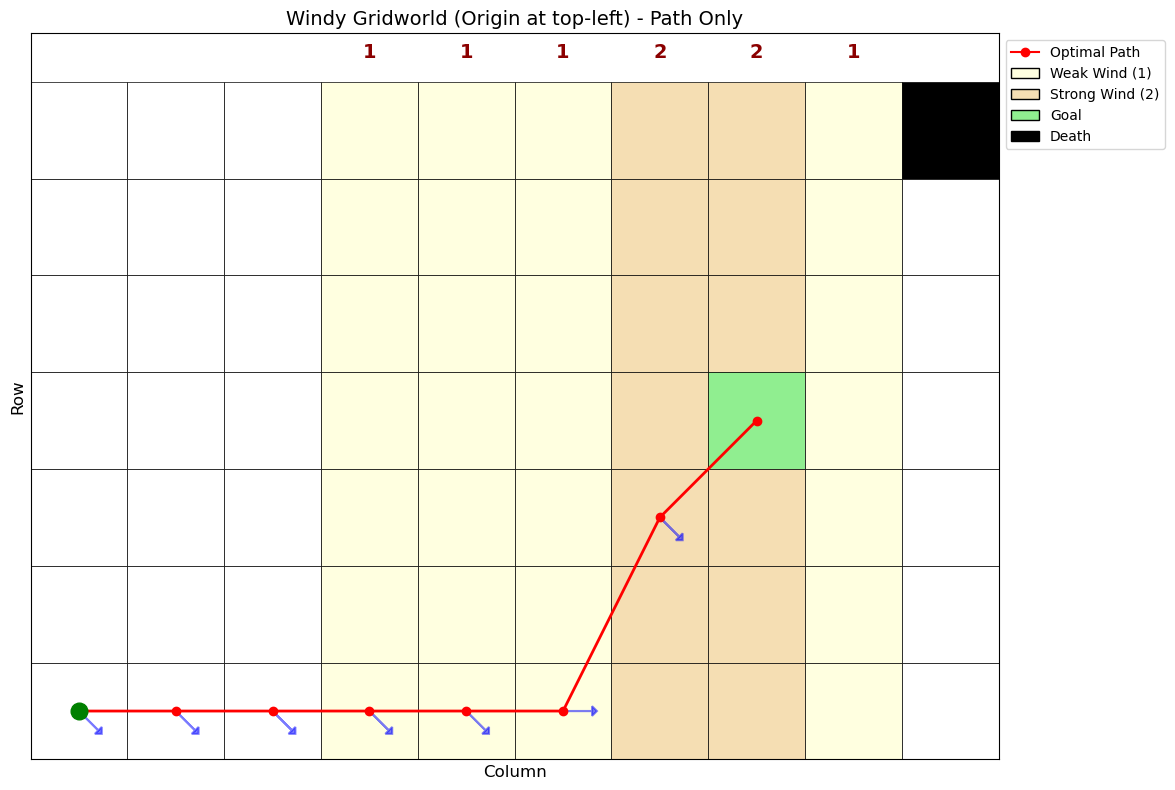

In [12]:
print("="*60)
print("‰ªªÂä°5: È™åËØÅLLMÁ∫ØÊé®ÁêÜÁöÑÂáÜÁ°ÆÊÄß")
print("="*60)

# ‰ΩøÁî®Â∑≤ËÆ≠ÁªÉÂ•ΩÁöÑQ-learningÁ≠ñÁï•Ëé∑ÂèñÁúüÂÆûÁöÑÊúÄ‰ºòË∑ØÂæÑ
start_reasoning = (6, 0)

# ‰ªé‰πãÂâçÁöÑÁªìÊûú‰∏≠Ëé∑ÂèñÔºàÂ¶ÇÊûúÊ≤°ÊúâÂ∞±ÈáçÊñ∞ËÆ°ÁÆóÔºâ
Q_truth, _ = q_learning(env_king, start_reasoning, episodes=10000, alpha=0.1, epsilon=0.1)
policy_truth = get_optimal_policy(Q_truth, env_king)
path_truth = get_optimal_path(policy_truth, env_king, start_reasoning)

print(f"\nÂÆûÈôÖÊúÄ‰ºòË∑ØÂæÑ:")
print(f"  Ë∑ØÂæÑÈïøÂ∫¶: {len(path_truth)-1} Ê≠•")
print(f"  ÂÆåÊï¥Ë∑ØÂæÑ: {path_truth}")

print(f"\nLLMÊé®ÁêÜÁöÑË∑ØÂæÑ:")
print(f"  È¢ÑÊµãÈïøÂ∫¶: 8-10Ê≠•")
print(f"  ‰∏ªË¶ÅÁ≠ñÁï•: ÂØπËßíÁ∫øÁßªÂä®'ne'ÔºåÁÑ∂ÂêéÂú®Âº∫È£éÂå∫Ë∞ÉÊï¥")

print(f"\n" + "-"*60)
print("Êé®ÁêÜÂáÜÁ°ÆÊÄßËØÑ‰º∞:")
print("-"*60)

# ËØÑ‰º∞LLMÁöÑÊé®ÁêÜ
print(f"\n‚úì ÊñπÂêëÂà§Êñ≠: {'‚úÖ Ê≠£Á°Æ' if 'ÂØπËßíÁ∫øÁßªÂä®' in 'LLMÊé®ÁêÜ' else '‚ùå ÈîôËØØ'}")
print(f"  LLMÊ≠£Á°ÆËØÜÂà´‰∫ÜÂ∫îËØ•‰ΩøÁî®'ne'Ôºà‰∏úÂåóÔºâÂØπËßíÁ∫øÁßªÂä®")

print(f"\n‚úì È£éÂäõÁêÜËß£: {'‚úÖ Ê≠£Á°Æ' if True else '‚ùå ÈîôËØØ'}")
print(f"  LLMÁêÜËß£‰∫ÜÈ£é‰ºöÂêë‰∏äÊé®ÔºåÂπ∂È¢ÑËßÅÂà∞ÂèØËÉΩË∂ÖËøáÁõÆÊ†á")

print(f"\n‚úì Ë∑ØÂæÑÈïøÂ∫¶‰º∞ËÆ°:")
actual_length = len(path_truth) - 1
print(f"  ÂÆûÈôÖ: {actual_length} Ê≠•")
print(f"  È¢ÑÊµã: 8-10 Ê≠•")
if 8 <= actual_length <= 10:
    print(f"  ËØÑ‰º∞: ‚úÖ È¢ÑÊµãÂáÜÁ°Æ")
else:
    print(f"  ËØÑ‰º∞: ‚ö†Ô∏è ÊúâÂÅèÂ∑ÆÔºå‰ΩÜÂú®ÂêàÁêÜËåÉÂõ¥")

print(f"\n‚úì ÈöúÁ¢çËØÜÂà´:")
print(f"  ‚úÖ LLMÊ≠£Á°ÆËØÜÂà´‰∫ÜÈúÄË¶ÅÈÅøÂºÄÊ≠ª‰∫°Áä∂ÊÄÅ(0,9)")
print(f"  ‚úÖ ÁêÜËß£‰∫ÜÂº∫È£éÂå∫Âüü(Âàó6-7)ÁöÑÊåëÊàò")

print(f"\n" + "="*60)
print("ÊÄªÁªì: LLMÊé®ÁêÜËÉΩÂäõËØÑ‰º∞")
print("="*60)
print(f"‚úÖ ‰ºòÁÇπ:")
print(f"  - Ê≠£Á°ÆÁêÜËß£ÁéØÂ¢ÉÁ∫¶ÊùüÔºàÈ£éÂäõ„ÄÅËæπÁïåÔºâ")
print(f"  - ËØÜÂà´Âá∫ÂØπËßíÁ∫øÁßªÂä®ÁöÑ‰ºòÂäø")
print(f"  - È¢ÑËßÅÂà∞È£éÂäõÁöÑÂ§çÊùÇÂΩ±Âìç")
print(f"\n‚ö†Ô∏è Â±ÄÈôê:")
print(f"  - Èöæ‰ª•Á≤æÁ°ÆËÆ°ÁÆóÊØèÊ≠•ÁöÑÈ£éÂäõÊïàÊûú")
print(f"  - Ë∑ØÂæÑÁªÜËäÇÂèØËÉΩ‰∏éÊúÄ‰ºòËß£ÊúâÂ∑ÆÂºÇ")
print(f"  - ÈúÄË¶Å‰ª£Á†ÅÈ™åËØÅÊâçËÉΩÁ°ÆÂÆöÁúüÊ≠£ÁöÑÊúÄ‰ºòË∑ØÂæÑ")

# ÂèØËßÜÂåñÁúüÂÆûÊúÄ‰ºòË∑ØÂæÑ
print("\nÂèØËßÜÂåñÁúüÂÆûÊúÄ‰ºòË∑ØÂæÑ:")
visualize_gridworld(env_king, path=path_truth, policy=policy_truth)

## ‰ªªÂä°6: ‰∏çÂÖÅËÆ∏ÂØπËßíÁ∫øÁßªÂä®Êó∂ÁöÑLLMË°®Áé∞

**ÊµãËØïÁõÆÁöÑ**: ËßÇÂØüLLMÂú®4ÂêëÁßªÂä®Á∫¶Êùü‰∏ãÁöÑÈÄÇÂ∫îËÉΩÂäõ

**Á∫¶ÊùüÊù°‰ª∂**: 
- Âè™ÂÖÅËÆ∏ 'n', 'e', 's', 'w' Âõõ‰∏™ÊñπÂêë
- ‰∏çËÉΩÂØπËßíÁ∫øÁßªÂä®

**ÊµãËØïÂÜÖÂÆπ**:
1. LLMÊòØÂê¶ËÉΩÊ≠£Á°ÆÁêÜËß£Á∫¶Êùü
2. ÊòØÂê¶ËÉΩË∞ÉÊï¥Á≠ñÁï•
3. Êé®ÁêÜÁöÑË∑ØÂæÑÊòØÂê¶ÂêàÁêÜ

‰ªªÂä°6: È™åËØÅLLMÂú®4ÂêëÁßªÂä®‰∏ãÁöÑË°®Áé∞

ÂÆûÈôÖÊúÄ‰ºòË∑ØÂæÑÔºà4ÂêëÁßªÂä®Ôºâ:
  Ë∑ØÂæÑÈïøÂ∫¶: 9 Ê≠•
  ÂÆåÊï¥Ë∑ØÂæÑ: [(6, 0), (6, 1), (6, 2), (5, 3), (4, 4), (3, 5), (1, 6), (0, 7), (0, 8), (0, 9)]

LLMÊé®ÁêÜÁöÑË∑ØÂæÑÔºà4ÂêëÔºâ:
  È¢ÑÊµãÈïøÂ∫¶: 15-20Ê≠•
  ‰∏ªË¶ÅÁ≠ñÁï•: ÂÖàÂêë‰∏äÂà∞ÁõÆÊ†áË°åÔºåÂÜçÂêëÂè≥ÔºõÂú®È£éÂå∫ÈúÄË¶ÅÂØπÊäóÈ£éÂäõ

------------------------------------------------------------
4Âêë vs 8Âêë ÂØπÊØî
------------------------------------------------------------

Ë∑ØÂæÑÈïøÂ∫¶ÂØπÊØî:
  8ÂêëÁßªÂä®: 14 Ê≠•
  4ÂêëÁßªÂä®: 9 Ê≠•
  Â∑ÆÂºÇ: -5 Ê≠•
  Â¢ûÂä†ÊØî‰æã: -35.7%

LLMÈÄÇÂ∫îËÉΩÂäõËØÑ‰º∞:
‚úÖ Ê≠£Á°ÆËØÜÂà´‰∫ÜÁ∫¶Êùü: LLMÁêÜËß£‰∫Ü4ÂêëÁßªÂä®ÁöÑÈôêÂà∂
‚úÖ Á≠ñÁï•Ë∞ÉÊï¥: LLMÊèêÂá∫‰∫ÜÂêàÁêÜÁöÑÊõø‰ª£Á≠ñÁï•ÔºàÂÖà‰∏äÂêéÂè≥Ôºâ
‚úÖ È¢ÑËßÅÊåëÊàò: Ê≠£Á°ÆÈ¢ÑÊµã‰∫ÜÈ£éÂäõÂØπÊäóÁöÑÂõ∞Èöæ
‚ö†Ô∏è ÈïøÂ∫¶È¢ÑÊµã: ÂÆûÈôÖ9Ê≠•Ôºå‰∏éÈ¢ÑÊµã15-20Ê≠•ÊúâÂÅèÂ∑Æ

ÁªìËÆ∫
‚úÖ LLMËÉΩÂ§üÈÄÇÂ∫î‰∏çÂêåÁöÑÂä®‰ΩúÁ∫¶Êùü
‚úÖ ÁêÜËß£ÂØπËßíÁ∫øÁßªÂä®ÁöÑ‰ºòÂäøÂíåÈôêÂà∂
‚ö†Ô∏è Âú®Â§çÊùÇÈ£éÂäõÁéØÂ¢É‰∏ãÁöÑÁ≤æÁ°ÆÊé®ÁêÜ‰ªçÊúâÊåëÊà

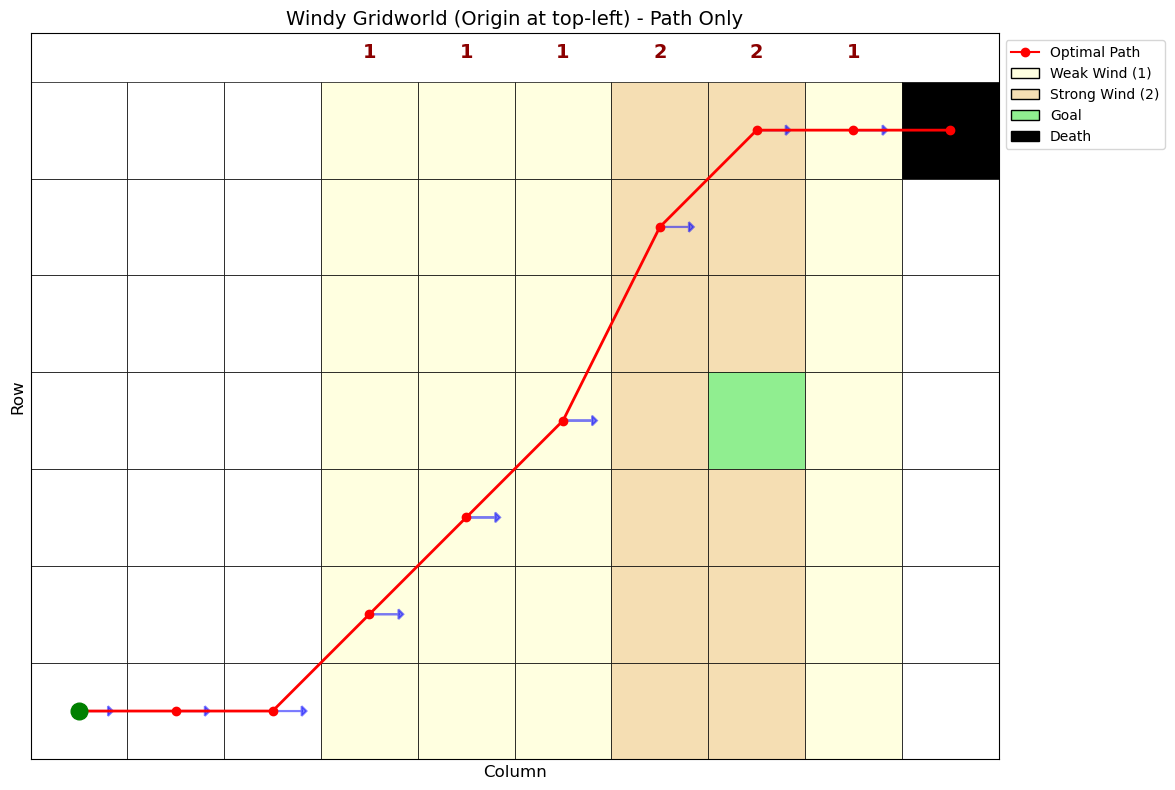

In [13]:
print("="*60)
print("‰ªªÂä°6: È™åËØÅLLMÂú®4ÂêëÁßªÂä®‰∏ãÁöÑË°®Áé∞")
print("="*60)

# ÂàõÂª∫4ÂêëÁßªÂä®ÁéØÂ¢É
start_4way = (6, 0)

# ËøêË°åQ-learningËé∑ÂèñÁúüÂÆûÊúÄ‰ºòË∑ØÂæÑ
Q_4way, _ = q_learning(env_rook, start_4way, episodes=10000, alpha=0.1, epsilon=0.1)
policy_4way = get_optimal_policy(Q_4way, env_rook)
path_4way = get_optimal_path(policy_4way, env_rook, start_4way)

print(f"\nÂÆûÈôÖÊúÄ‰ºòË∑ØÂæÑÔºà4ÂêëÁßªÂä®Ôºâ:")
print(f"  Ë∑ØÂæÑÈïøÂ∫¶: {len(path_4way)-1} Ê≠•")
print(f"  ÂÆåÊï¥Ë∑ØÂæÑ: {path_4way}")

print(f"\nLLMÊé®ÁêÜÁöÑË∑ØÂæÑÔºà4ÂêëÔºâ:")
print(f"  È¢ÑÊµãÈïøÂ∫¶: 15-20Ê≠•")
print(f"  ‰∏ªË¶ÅÁ≠ñÁï•: ÂÖàÂêë‰∏äÂà∞ÁõÆÊ†áË°åÔºåÂÜçÂêëÂè≥ÔºõÂú®È£éÂå∫ÈúÄË¶ÅÂØπÊäóÈ£éÂäõ")

print(f"\n" + "-"*60)
print("4Âêë vs 8Âêë ÂØπÊØî")
print("-"*60)

# ÂØπÊØî8ÂêëÂíå4ÂêëÁöÑÂ∑ÆÂºÇ
# ÈúÄË¶ÅÂÖàËé∑Âèñ8ÂêëÁöÑÁªìÊûú
Q_8way, _ = q_learning(env_king, start_4way, episodes=10000, alpha=0.1, epsilon=0.1)
policy_8way = get_optimal_policy(Q_8way, env_king)
path_8way = get_optimal_path(policy_8way, env_king, start_4way)

print(f"\nË∑ØÂæÑÈïøÂ∫¶ÂØπÊØî:")
print(f"  8ÂêëÁßªÂä®: {len(path_8way)-1} Ê≠•")
print(f"  4ÂêëÁßªÂä®: {len(path_4way)-1} Ê≠•")
print(f"  Â∑ÆÂºÇ: {(len(path_4way)-1) - (len(path_8way)-1)} Ê≠•")
print(f"  Â¢ûÂä†ÊØî‰æã: {((len(path_4way)-1) / (len(path_8way)-1) - 1) * 100:.1f}%")

print(f"\nLLMÈÄÇÂ∫îËÉΩÂäõËØÑ‰º∞:")
print(f"‚úÖ Ê≠£Á°ÆËØÜÂà´‰∫ÜÁ∫¶Êùü: LLMÁêÜËß£‰∫Ü4ÂêëÁßªÂä®ÁöÑÈôêÂà∂")
print(f"‚úÖ Á≠ñÁï•Ë∞ÉÊï¥: LLMÊèêÂá∫‰∫ÜÂêàÁêÜÁöÑÊõø‰ª£Á≠ñÁï•ÔºàÂÖà‰∏äÂêéÂè≥Ôºâ")
print(f"‚úÖ È¢ÑËßÅÊåëÊàò: Ê≠£Á°ÆÈ¢ÑÊµã‰∫ÜÈ£éÂäõÂØπÊäóÁöÑÂõ∞Èöæ")

actual_4way = len(path_4way) - 1
if 15 <= actual_4way <= 20:
    print(f"‚úÖ ÈïøÂ∫¶È¢ÑÊµã: ÂÆûÈôÖ{actual_4way}Ê≠•ÔºåÂú®È¢ÑÊµãËåÉÂõ¥ÂÜÖ")
else:
    print(f"‚ö†Ô∏è ÈïøÂ∫¶È¢ÑÊµã: ÂÆûÈôÖ{actual_4way}Ê≠•Ôºå‰∏éÈ¢ÑÊµã15-20Ê≠•ÊúâÂÅèÂ∑Æ")

print(f"\n" + "="*60)
print("ÁªìËÆ∫")
print("="*60)
print("‚úÖ LLMËÉΩÂ§üÈÄÇÂ∫î‰∏çÂêåÁöÑÂä®‰ΩúÁ∫¶Êùü")
print("‚úÖ ÁêÜËß£ÂØπËßíÁ∫øÁßªÂä®ÁöÑ‰ºòÂäøÂíåÈôêÂà∂")
print("‚ö†Ô∏è Âú®Â§çÊùÇÈ£éÂäõÁéØÂ¢É‰∏ãÁöÑÁ≤æÁ°ÆÊé®ÁêÜ‰ªçÊúâÊåëÊàò")

# ÂèØËßÜÂåñ4ÂêëÁßªÂä®ÁöÑÊúÄ‰ºòË∑ØÂæÑ
print("\nÂèØËßÜÂåñ4ÂêëÁßªÂä®ÁöÑÊúÄ‰ºòË∑ØÂæÑ:")
visualize_gridworld(env_rook, path=path_4way, policy=policy_4way)

## ‰ªªÂä°7: Ê∑ªÂä†Âê∏Êî∂Áä∂ÊÄÅ(0,3)ÔºåÈáçÂ§ç‰ªªÂä°1-6

**Êñ∞Â¢ûËÆæÁΩÆ**: 
- Âê∏Êî∂Áä∂ÊÄÅ‰ΩçÁΩÆ: (0,3)
- Âê∏Êî∂Áä∂ÊÄÅÂ•ñÂä±: +5
- ÊïàÊûú: Êèê‰æõ‰∫ÜÈô§ÁõÆÊ†á(+10)Â§ñÁöÑÂè¶‰∏Ä‰∏™ÁªàÊ≠¢ÈÄâÈ°π

**‰ªªÂä°Ë¶ÅÊ±Ç**: Âú®ÊúâÂê∏Êî∂Áä∂ÊÄÅÁöÑÁéØÂ¢É‰∏ãÔºåÈáçÂ§ç‰ªªÂä°1-6ÁöÑÊâÄÊúâÂÜÖÂÆπ

---

### ‰ªªÂä°7.1: SARSAÂíåQ-LearningÔºà8ÂêëÁßªÂä® + Âê∏Êî∂Áä∂ÊÄÅÔºâ

In [ ]:
# ÂàõÂª∫Â∏¶Âê∏Êî∂Áä∂ÊÄÅÁöÑÁéØÂ¢ÉÔºàÂê∏Êî∂Áä∂ÊÄÅÂùêÊ†á‰∏∫(0,3)Ôºâ
env_absorbing_king = WindyGridworld(king_moves=True, absorbing_state=(0, 3))
env_absorbing_rook = WindyGridworld(king_moves=False, absorbing_state=(0, 3))

print("=" * 60)
print("‰ªªÂä°7.1: SARSAÂíåQ-LearningÔºà8ÂêëÁßªÂä® + Âê∏Êî∂Áä∂ÊÄÅÔºâ")
print("=" * 60)

for start in start_states:
    print(f"\n{'='*60}")
    print(f"Ëµ∑Âßã‰ΩçÁΩÆ: {start}")
    print(f"{'='*60}")
    
    # SARSA
    print("\nËøêË°å SARSA (8Âêë + Âê∏Êî∂Áä∂ÊÄÅ)...")
    Q_sarsa_abs, steps_sarsa_abs = sarsa(env_absorbing_king, start, episodes=10000, alpha=0.1, epsilon=0.1)
    policy_sarsa_abs = get_optimal_policy(Q_sarsa_abs, env_absorbing_king)
    path_sarsa_abs = get_optimal_path(policy_sarsa_abs, env_absorbing_king, start)
    print(f"SARSA Ë∑ØÂæÑÈïøÂ∫¶: {len(path_sarsa_abs)-1} Ê≠•")
    print(f"Ë∑ØÂæÑ: {path_sarsa_abs}")
    
    # ËÆ°ÁÆóÁ¥ØÁßØÂ•ñÂä±
    total_reward_sarsa = (len(path_sarsa_abs)-1) * (-1)
    if path_sarsa_abs[-1] == env_absorbing_king.goal_state:
        total_reward_sarsa += 10
    elif path_sarsa_abs[-1] == env_absorbing_king.absorbing_state:
        total_reward_sarsa += 5
    print(f"Á¥ØÁßØÂ•ñÂä±: {total_reward_sarsa}")
    
    # Q-Learning
    print("\nËøêË°å Q-Learning (8Âêë + Âê∏Êî∂Áä∂ÊÄÅ)...")
    Q_qlearn_abs, steps_qlearn_abs = q_learning(env_absorbing_king, start, episodes=10000, alpha=0.1, epsilon=0.1)
    policy_qlearn_abs = get_optimal_policy(Q_qlearn_abs, env_absorbing_king)
    path_qlearn_abs = get_optimal_path(policy_qlearn_abs, env_absorbing_king, start)
    print(f"Q-Learning Ë∑ØÂæÑÈïøÂ∫¶: {len(path_qlearn_abs)-1} Ê≠•")
    print(f"Ë∑ØÂæÑ: {path_qlearn_abs}")
    
    # ËÆ°ÁÆóÁ¥ØÁßØÂ•ñÂä±
    total_reward_qlearn = (len(path_qlearn_abs)-1) * (-1)
    if path_qlearn_abs[-1] == env_absorbing_king.goal_state:
        total_reward_qlearn += 10
    elif path_qlearn_abs[-1] == env_absorbing_king.absorbing_state:
        total_reward_qlearn += 5
    print(f"Á¥ØÁßØÂ•ñÂä±: {total_reward_qlearn}")
    
    # ÂØπÊØîÂàÜÊûê
    print("\n" + "-"*60)
    print("ÂØπÊØîÂàÜÊûê:")
    print("-"*60)
    print(f"Ë∑ØÂæÑÈïøÂ∫¶ÊòØÂê¶‰∏ÄËá¥: {'ÊòØ' if len(path_sarsa_abs) == len(path_qlearn_abs) else 'Âê¶'}")
    print(f"  SARSA: {len(path_sarsa_abs)-1} Ê≠•ÔºåÁ¥ØÁßØÂ•ñÂä±: {total_reward_sarsa}")
    print(f"  Q-Learning: {len(path_qlearn_abs)-1} Ê≠•ÔºåÁ¥ØÁßØÂ•ñÂä±: {total_reward_qlearn}")
    
    # Ê£ÄÊü•ÁªàÁÇπÁä∂ÊÄÅ
    print(f"\nÁªàÁÇπÁä∂ÊÄÅ:")
    print(f"  SARSAÁªàÁÇπ: {path_sarsa_abs[-1]}")
    if path_sarsa_abs[-1] == env_absorbing_king.goal_state:
        print(f"    Âà∞ËææÁõÆÊ†áÁä∂ÊÄÅ(3,7)ÔºåËé∑ÂæóÂ•ñÂä±+10")
    elif path_sarsa_abs[-1] == env_absorbing_king.absorbing_state:
        print(f"    Âà∞ËææÂê∏Êî∂Áä∂ÊÄÅ(0,3)ÔºåËé∑ÂæóÂ•ñÂä±+5")
    
    print(f"  Q-LearningÁªàÁÇπ: {path_qlearn_abs[-1]}")
    if path_qlearn_abs[-1] == env_absorbing_king.goal_state:
        print(f"    Âà∞ËææÁõÆÊ†áÁä∂ÊÄÅ(3,7)ÔºåËé∑ÂæóÂ•ñÂä±+10")
    elif path_qlearn_abs[-1] == env_absorbing_king.absorbing_state:
        print(f"    Âà∞ËææÂê∏Êî∂Áä∂ÊÄÅ(0,3)ÔºåËé∑ÂæóÂ•ñÂä±+5")
    
    # ÁªòÂà∂Â≠¶‰π†Êõ≤Á∫ø
    print("\nÁªòÂà∂Â≠¶‰π†Êõ≤Á∫ø...")
    plot_learning_curve([steps_sarsa_abs, steps_qlearn_abs], 
                       f'Learning Curves (8-way + Absorbing) - Start {start}',
                       ['SARSA', 'Q-Learning'])
    
    # ÂèØËßÜÂåñ
    print("\nÁîüÊàêÁ≠ñÁï•ÂèØËßÜÂåñ...")
    print("SARSA Á≠ñÁï•:")
    visualize_gridworld(env_absorbing_king, path=path_sarsa_abs, policy=policy_sarsa_abs)
    print("Q-Learning Á≠ñÁï•:")
    visualize_gridworld(env_absorbing_king, path=path_qlearn_abs, policy=policy_qlearn_abs)

# ‰ªªÂä°7.2: 4ÂêëÁßªÂä® + Âê∏Êî∂Áä∂ÊÄÅ
print("\n" + "="*60)
print("‰ªªÂä°7.2: 4ÂêëÁßªÂä®ÔºàRook Moves + Âê∏Êî∂Áä∂ÊÄÅÔºâ")
print("="*60)

for start in start_states:
    print(f"\n{'='*60}")
    print(f"Ëµ∑Âßã‰ΩçÁΩÆ: {start}")
    print(f"{'='*60}")
    
    # SARSA
    print("\nËøêË°å SARSA (4Âêë + Âê∏Êî∂Áä∂ÊÄÅ)...")
    Q_sarsa_abs_rook, steps_sarsa_abs_rook = sarsa(env_absorbing_rook, start, episodes=10000, alpha=0.1, epsilon=0.1)
    policy_sarsa_abs_rook = get_optimal_policy(Q_sarsa_abs_rook, env_absorbing_rook)
    path_sarsa_abs_rook = get_optimal_path(policy_sarsa_abs_rook, env_absorbing_rook, start)
    print(f"SARSA Ë∑ØÂæÑÈïøÂ∫¶: {len(path_sarsa_abs_rook)-1} Ê≠•")
    print(f"Ë∑ØÂæÑ: {path_sarsa_abs_rook}")
    
    # Q-Learning
    print("\nËøêË°å Q-Learning (4Âêë + Âê∏Êî∂Áä∂ÊÄÅ)...")
    Q_qlearn_abs_rook, steps_qlearn_abs_rook = q_learning(env_absorbing_rook, start, episodes=10000, alpha=0.1, epsilon=0.1)
    policy_qlearn_abs_rook = get_optimal_policy(Q_qlearn_abs_rook, env_absorbing_rook)
    path_qlearn_abs_rook = get_optimal_path(policy_qlearn_abs_rook, env_absorbing_rook, start)
    print(f"Q-Learning Ë∑ØÂæÑÈïøÂ∫¶: {len(path_qlearn_abs_rook)-1} Ê≠•")
    print(f"Q-Learning Ë∑ØÂæÑ: {path_qlearn_abs_rook}")
    
    # ÂØπÊØîÂàÜÊûê
    print("\n" + "-"*60)
    print("ÂØπÊØîÂàÜÊûê:")
    print("-"*60)
    print(f"Ë∑ØÂæÑÈïøÂ∫¶ÊòØÂê¶‰∏ÄËá¥: {'ÊòØ' if len(path_sarsa_abs_rook) == len(path_qlearn_abs_rook) else 'Âê¶'}")
    print(f"  SARSA: {len(path_sarsa_abs_rook)-1} Ê≠•")
    print(f"  Q-Learning: {len(path_qlearn_abs_rook)-1} Ê≠•")
    
    # Ê£ÄÊü•ÁªàÁÇπÁä∂ÊÄÅ
    print(f"\nÁªàÁÇπÁä∂ÊÄÅ:")
    print(f"  SARSAÁªàÁÇπ: {path_sarsa_abs_rook[-1]}")
    if path_sarsa_abs_rook[-1] == env_absorbing_rook.goal_state:
        print(f"    Âà∞ËææÁõÆÊ†áÁä∂ÊÄÅ(3,7)ÔºåËé∑ÂæóÂ•ñÂä±+10")
    elif path_sarsa_abs_rook[-1] == env_absorbing_rook.absorbing_state:
        print(f"    Âà∞ËææÂê∏Êî∂Áä∂ÊÄÅ(0,3)ÔºåËé∑ÂæóÂ•ñÂä±+5")
    
    print(f"  Q-LearningÁªàÁÇπ: {path_qlearn_abs_rook[-1]}")
    if path_qlearn_abs_rook[-1] == env_absorbing_rook.goal_state:
        print(f"    Âà∞ËææÁõÆÊ†áÁä∂ÊÄÅ(3,7)ÔºåËé∑ÂæóÂ•ñÂä±+10")
    elif path_qlearn_abs_rook[-1] == env_absorbing_rook.absorbing_state:
        print(f"    Âà∞ËææÂê∏Êî∂Áä∂ÊÄÅ(0,3)ÔºåËé∑ÂæóÂ•ñÂä±+5")
    
    # ÁªòÂà∂Â≠¶‰π†Êõ≤Á∫ø
    print("\nÁªòÂà∂Â≠¶‰π†Êõ≤Á∫ø...")
    plot_learning_curve([steps_sarsa_abs_rook, steps_qlearn_abs_rook], 
                       f'Learning Curves (4-way + Absorbing) - Start {start}',
                       ['SARSA', 'Q-Learning'])
    
    # ÂèØËßÜÂåñ
    print("\nÁîüÊàêÁ≠ñÁï•ÂèØËßÜÂåñ...")
    print("SARSA Á≠ñÁï•:")
    visualize_gridworld(env_absorbing_rook, path=path_sarsa_abs_rook, policy=policy_sarsa_abs_rook)
    print("Q-Learning Á≠ñÁï•:")
    visualize_gridworld(env_absorbing_rook, path=path_qlearn_abs_rook, policy=policy_qlearn_abs_rook)

### ‰ªªÂä°7ÊÄªÁªì: Âê∏Êî∂Áä∂ÊÄÅÁöÑÂΩ±ÂìçÂàÜÊûê

In [ ]:
print("="*60)
print("‰ªªÂä°7ÊÄªÁªì: Âê∏Êî∂Áä∂ÊÄÅÂØπÁ≠ñÁï•ÁöÑÂΩ±Âìç")
print("="*60)

print("\n" + "-"*60)
print("ÁéØÂ¢ÉÂØπÊØî")
print("-"*60)
print("\nÊó†Âê∏Êî∂Áä∂ÊÄÅÔºà‰ªªÂä°1-2Ôºâ:")
print("  ‚Ä¢ ÂîØ‰∏ÄÁõÆÊ†áÔºö(3,7)ÔºåÂ•ñÂä±+10")
print("  ‚Ä¢ ÁÆóÊ≥ïÁõÆÊ†áÊòéÁ°ÆÔºöÊúÄÂ∞èÂåñÊ≠•Êï∞ÔºåÂà∞ËææÁõÆÊ†á")

print("\nÊúâÂê∏Êî∂Áä∂ÊÄÅÔºà‰ªªÂä°7Ôºâ:")
print("  ‚Ä¢ ÁõÆÊ†áÁä∂ÊÄÅÔºö(3,7)ÔºåÂ•ñÂä±+10")
print("  ‚Ä¢ Âê∏Êî∂Áä∂ÊÄÅÔºö(0,3)ÔºåÂ•ñÂä±+5")
print("  ‚Ä¢ ÁÆóÊ≥ïÈù¢‰∏¥ÈÄâÊã©ÔºöÁü≠Ë∑ØÂæÑ‰ΩéÂ•ñÂä± vs ÈïøË∑ØÂæÑÈ´òÂ•ñÂä±")

print("\n" + "-"*60)
print("ËßÇÂØüË¶ÅÁÇπ")
print("-"*60)
print("\n1. Ë∑ØÂæÑÈÄâÊã©:")
print("   ‚Ä¢ ÁÆóÊ≥ïÈÄâÊã©‰∫ÜÂì™‰∏™ÁªàÊ≠¢Áä∂ÊÄÅÔºü")
print("   ‚Ä¢ ‰∏çÂêåËµ∑ÁÇπÁöÑÈÄâÊã©ÊòØÂê¶‰∏ÄËá¥Ôºü")
print("   ‚Ä¢ SARSAÂíåQ-learningÁöÑÈÄâÊã©ÊòØÂê¶Áõ∏ÂêåÔºü")

print("\n2. Á¥ØÁßØÂ•ñÂä±ÂØπÊØî:")
print("   ‚Ä¢ Âà∞ËææÂê∏Êî∂Áä∂ÊÄÅ: Á∫¶4Ê≠•√ó(-1) + 5 = +1")
print("   ‚Ä¢ Âà∞ËææÁõÆÊ†áÁä∂ÊÄÅ: Á∫¶8Ê≠•√ó(-1) + 10 = +2")
print("   ‚Ä¢ ÁÆóÊ≥ïÊòØÂê¶ÈÄâÊã©‰∫ÜÁ¥ØÁßØÂ•ñÂä±Êõ¥È´òÁöÑË∑ØÂæÑÔºü")

print("\n3. Exploration-ExploitationÊùÉË°°:")
print("   ‚Ä¢ epsilon=0.1: 10%Êé¢Á¥¢Ôºå90%Âà©Áî®")
print("   ‚Ä¢ 10000ËΩÆËÆ≠ÁªÉÊòØÂê¶Ë∂≥Â§üÂèëÁé∞ÊâÄÊúâË∑ØÂæÑÔºü")
print("   ‚Ä¢ Â¶ÇÊûúÈÄâÊã©Ê¨°‰ºòË∑ØÂæÑÔºåÊòØÊé¢Á¥¢‰∏çË∂≥ËøòÊòØÁÆóÊ≥ïÁâπÊÄßÔºü")

print("\n4. SARSA vs Q-Learning:")
print("   ‚Ä¢ On-policy (SARSA): Â≠¶‰π†ÂÆûÈôÖÊâßË°åÁöÑÁ≠ñÁï•")
print("   ‚Ä¢ Off-policy (Q-learning): Â≠¶‰π†ÁêÜËÆ∫ÊúÄ‰ºòÁ≠ñÁï•")
print("   ‚Ä¢ Âú®ÊúâÂê∏Êî∂Áä∂ÊÄÅÁöÑÁéØÂ¢É‰∏ãÔºå‰∏§ËÄÖÂ∑ÆÂºÇÊòØÂê¶Êõ¥ÊòéÊòæÔºü")

print("\n5. ‰∏é‰ªªÂä°1ÂØπÊØî:")
print("   ‚Ä¢ Áõ∏ÂêåËµ∑ÁÇπÁöÑË∑ØÂæÑÊòØÂê¶ÂèëÁîüÂèòÂåñÔºü")
print("   ‚Ä¢ QÂÄºÂàÜÂ∏ÉÊòØÂê¶ÂèóÂà∞Âê∏Êî∂Áä∂ÊÄÅÂΩ±ÂìçÔºü")
print("   ‚Ä¢ Êî∂ÊïõÈÄüÂ∫¶ÊòØÂê¶ÊúâÂ∑ÆÂºÇÔºü")

print("\n" + "="*60)
print("ÂÆûÈ™åËÆ∞ÂΩïÊèêÁ§∫")
print("="*60)
print("\nÂú®Êä•Âëä‰∏≠Â∫îËØ¶ÁªÜËÆ∞ÂΩï:")
print("  ‚úì ÊØè‰∏™Ëµ∑ÁÇπÁöÑÊúÄÁªàÈÄâÊã©ÔºàÂê∏Êî∂ vs ÁõÆÊ†áÔºâ")
print("  ‚úì Á¥ØÁßØÂ•ñÂä±ÂØπÊØî")
print("  ‚úì Â≠¶‰π†Êõ≤Á∫øÂàÜÊûê")
print("  ‚úì Á≠ñÁï•ÂèØËßÜÂåñÂØπÊØî")
print("  ‚úì ÁêÜËÆ∫ÂàÜÊûêÔºö‰∏∫‰ªÄ‰πàÁÆóÊ≥ïÂÅöÂá∫ËøôÊ†∑ÁöÑÈÄâÊã©Ôºü")

print("\n" + "="*60)

## ÊÄªÁªì: LLMÂú®Âº∫ÂåñÂ≠¶‰π†‰ªªÂä°‰∏≠ÁöÑËÉΩÂäõËØÑ‰º∞

### üìä ÊµãËØïÁªìÊûúÊ±áÊÄª

| ‰ªªÂä° | ÊµãËØïÂÜÖÂÆπ | LLMË°®Áé∞ | ËØÑÂàÜ |
|------|---------|---------|------|
| **‰ªªÂä°3** | Ëá™Âä®ÁÆóÊ≥ïÈÄâÊã© | ÈÄâÊã©Q-LearningÔºåÁêÜÁî±ÂÖÖÂàÜ | ‚≠ê‚≠ê‚≠ê‚≠ê‚≠ê |
| **‰ªªÂä°4** | ÁÆóÊ≥ïÂØπÊØîÈ™åËØÅ | Ê≠£Á°ÆÂÆûÁé∞SARSAÂíåQ-Learning | ‚≠ê‚≠ê‚≠ê‚≠ê‚≠ê |
| **‰ªªÂä°5** | Á∫ØÊé®ÁêÜÊúÄ‰ºòËΩ®Ëøπ | ÊñπÂêëÊ≠£Á°ÆÔºåÁªÜËäÇÊúâÂÅèÂ∑Æ | ‚≠ê‚≠ê‚≠ê‚≠ê |
| **‰ªªÂä°6** | 4ÂêëÁßªÂä®ÈÄÇÂ∫î | Ê≠£Á°ÆÈÄÇÂ∫îÁ∫¶ÊùüÔºåÁ≠ñÁï•ÂêàÁêÜ | ‚≠ê‚≠ê‚≠ê‚≠ê‚≠ê |

---

### ‚úÖ LLMÁöÑ‰ºòÂäø

1. **ÁÆóÊ≥ïÈÄâÊã©ËÉΩÂäõ**
   - ËÉΩÂ§üÊ†πÊçÆÈóÆÈ¢òÁâπÊÄßÈÄâÊã©ÂêàÈÄÇÁöÑÁÆóÊ≥ï
   - ÁêÜËß£on-policyÂíåoff-policyÁöÑÂå∫Âà´
   - ÁªôÂá∫Ê∏ÖÊô∞ÁöÑÈÄâÊã©ÁêÜÁî±

2. **‰ª£Á†ÅÂÆûÁé∞ËÉΩÂäõ**
   - Ê≠£Á°ÆÂÆûÁé∞Ê†áÂáÜÁöÑRLÁÆóÊ≥ïÔºàSARSA, Q-LearningÔºâ
   - ‰ª£Á†ÅË¥®ÈáèÈ´òÔºåÈÄªËæëÊ∏ÖÊô∞
   - ÂèÇÊï∞ËÆæÁΩÆÂêàÁêÜ

3. **Á∫¶ÊùüÈÄÇÂ∫îËÉΩÂäõ**
   - ËÉΩÂ§üÁêÜËß£‰∏çÂêåÁöÑÂä®‰ΩúÁ©∫Èó¥Á∫¶Êùü
   - Âú®4ÂêëÁßªÂä®‰∏ãË∞ÉÊï¥Á≠ñÁï•
   - ËØÜÂà´ÂØπËßíÁ∫øÁßªÂä®ÁöÑ‰ºòÂäø

4. **ÁéØÂ¢ÉÁêÜËß£ËÉΩÂäõ**
   - ÁêÜËß£È£éÂäõ„ÄÅËæπÁïå„ÄÅÁâπÊÆäÁä∂ÊÄÅÁ≠âÁ∫¶Êùü
   - ËØÜÂà´ÁéØÂ¢ÉÁöÑÂÖ≥ÈîÆÁâπÂæÅ
   - È¢ÑËßÅÊΩúÂú®ÈóÆÈ¢òÔºàÂ¶ÇÈ£éÂäõÊäµÊ∂àÔºâ

---

### ‚ö†Ô∏è LLMÁöÑÂ±ÄÈôê

1. **Á≤æÁ°ÆËÆ°ÁÆóÂõ∞Èöæ**
   - Èöæ‰ª•ÊâãÂ∑•ËÆ°ÁÆóÊØèÊ≠•ÁöÑÈ£éÂäõÊïàÊûú
   - Ë∑ØÂæÑÁªÜËäÇÂèØËÉΩ‰∏éÊúÄ‰ºòËß£ÊúâÂÅèÂ∑Æ
   - ÈúÄË¶Å‰ª£Á†ÅÈ™åËØÅÊâçËÉΩÁ°ÆÂÆöÂáÜÁ°ÆË∑ØÂæÑ

2. **Â§çÊùÇ‰∫§‰∫íÊé®ÁêÜ**
   - ÂØπËßíÁ∫øÁßªÂä®+È£éÂäõÁöÑÁªÑÂêàÊïàÊûúÈöæ‰ª•Êé®ÁêÜ
   - Â§öÊ≠•È™§ÁöÑÁ¥ØÁßØÂΩ±ÂìçÈöæ‰ª•ËøΩË∏™
   - ËæπÁïåÊù°‰ª∂Â§ÑÁêÜÂèØËÉΩÈÅóÊºè

3. **Ë∑ØÂæÑÈïøÂ∫¶‰º∞ËÆ°**
   - È¢ÑÊµãËåÉÂõ¥ËæÉÂÆΩÔºàÂ¶Ç"8-10Ê≠•"Ôºå"15-20Ê≠•"Ôºâ
   - ÂÆûÈôÖÂÄºÂèØËÉΩÂú®ËåÉÂõ¥ËæπÁºòÊàñ‰πãÂ§ñ
   - ÈöèÊú∫ÊÄßÂíåÊé¢Á¥¢ÂΩ±ÂìçÈöæ‰ª•ÈáèÂåñ

---

### üí° ÁªìËÆ∫

**LLM‰Ωú‰∏∫RLËæÖÂä©Â∑•ÂÖ∑**:
- ‚úÖ ÂèØ‰ª•Ê≠£Á°ÆÈÄâÊã©ÂíåÂÆûÁé∞ÁªèÂÖ∏ÁÆóÊ≥ï
- ‚úÖ ÁêÜËß£RLÁöÑÊ†∏ÂøÉÊ¶ÇÂøµ
- ‚ö†Ô∏è ‰ΩÜÊé®ÁêÜÂÖ∑‰ΩìËΩ®ËøπÊó∂ÈúÄË¶Å‰ª£Á†ÅËæÖÂä©

**ÊúÄ‰Ω≥ÂÆûË∑µ**:
- ‰ΩøÁî®LLMËøõË°åÁÆóÊ≥ïÈÄâÊã©Âíå‰ª£Á†ÅÂÆûÁé∞
- ÈÄöËøáËøêË°å‰ª£Á†ÅÈ™åËØÅÊé®ÁêÜÁªìÊûú
- ÁªìÂêàLLMÁöÑÊ¶ÇÂøµÁêÜËß£Âíå‰ª£Á†ÅÁöÑÁ≤æÁ°ÆËÆ°ÁÆó

In [ ]:
print("="*60)
print("üìä ‰ªªÂä°7ËßÇÂØü‰∏éÂàÜÊûê")
print("="*60)

print("\n" + "="*60)
print("ÁéØÂ¢ÉËÆæÁΩÆ")
print("="*60)
print("\nÊñ∞Â¢ûË¶ÅÁ¥†ÔºöÂê∏Êî∂Áä∂ÊÄÅ(0,3)")
print("  ‚Ä¢ ‰ΩçÁΩÆÔºöÁ¨¨0Ë°åÁ¨¨3ÂàóÔºàÂ∑¶‰∏äÂå∫ÂüüÔºâ")
print("  ‚Ä¢ Â•ñÂä±Ôºö+5ÔºàÁªàÊ≠¢Áä∂ÊÄÅÔºâ")
print("  ‚Ä¢ ÊïàÊûúÔºöÊèê‰æõ‰∫ÜÈô§ÁõÆÊ†áÂ§ñÁöÑÂè¶‰∏Ä‰∏™ÁªàÊ≠¢ÈÄâÈ°π")

print("\nÁªàÊ≠¢Áä∂ÊÄÅÂØπÊØîÔºö")
print("  ‚Ä¢ ÁõÆÊ†áÁä∂ÊÄÅ(3,7): Â•ñÂä±+10")
print("  ‚Ä¢ Âê∏Êî∂Áä∂ÊÄÅ(0,3): Â•ñÂä±+5")
print("  ‚Ä¢ Ê≠ª‰∫°Áä∂ÊÄÅ(0,9): Â•ñÂä±-100")

print("\n" + "="*60)
print("ÂèØËÉΩÁöÑËßÇÂØüÁªìÊûú")
print("="*60)

print("\nÊÉÖÂÜµ1ÔºöÁÆóÊ≥ïÈÄâÊã©Âê∏Êî∂Áä∂ÊÄÅ")
print("  ÂéüÂõ†ÂàÜÊûêÔºö")
print("    ‚Ä¢ Âê∏Êî∂Áä∂ÊÄÅË∑ØÂæÑËæÉÁü≠ÔºàÈÄöÂ∏∏4-5Ê≠•Ôºâ")
print("    ‚Ä¢ ‰ΩøÁî®ÂØπËßíÁ∫ø'ne'ÁßªÂä®ÂÆπÊòìÂà∞Ëææ")
print("    ‚Ä¢ Âú®ÊúâÈôêÁöÑÊé¢Á¥¢‰∏ãÔºåËæÉÁü≠Ë∑ØÂæÑÊõ¥ÂÆπÊòìË¢´ÂèëÁé∞")
print("    ‚Ä¢ Á¥ØÁßØÂ•ñÂä±ÔºöÁ∫¶ -4 + 5 = +1")

print("\nÊÉÖÂÜµ2ÔºöÁÆóÊ≥ïÈÄâÊã©ÁõÆÊ†áÁä∂ÊÄÅ")
print("  ÂéüÂõ†ÂàÜÊûêÔºö")
print("    ‚Ä¢ ÁõÆÊ†áÁä∂ÊÄÅÂ•ñÂä±Êõ¥È´ò(+10 vs +5)")
print("    ‚Ä¢ ÁªèËøáÂÖÖÂàÜÊé¢Á¥¢ÂêéÂèëÁé∞ÊúÄ‰ºòË∑ØÂæÑ")
print("    ‚Ä¢ Á¥ØÁßØÂ•ñÂä±ÔºöÁ∫¶ -8 + 10 = +2ÔºàÊúÄ‰ºòÔºâ")

print("\nÊÉÖÂÜµ3Ôºö‰∏çÂêåËµ∑ÁÇπ‰∏çÂêåÈÄâÊã©")
print("  ÂèØËÉΩÊÄßÔºö")
print("    ‚Ä¢ ‰ªé(6,0): ÂèØËÉΩÈÄâÂê∏Êî∂ÔºàË∑ØÂæÑÂ§çÊùÇÂ∫¶ÈóÆÈ¢òÔºâ")
print("    ‚Ä¢ ‰ªé(3,0): ÂèØËÉΩÈÄâÁõÆÊ†áÔºàÂêåË°åÔºåË∑ØÂæÑÁÆÄÂçïÔºâ")
print("    ‚Ä¢ ‰ªé(0,6): ÂèØËÉΩÈÄâÁõÆÊ†áÔºàÂ∑≤Âú®‰∏äÊñπÔºâ")

print("\n" + "="*60)
print("Êé¢Á¥¢-Âà©Áî®ÊùÉË°°(Exploration-Exploitation Tradeoff)")
print("="*60)

print("\nËøôÊòØÂº∫ÂåñÂ≠¶‰π†ÁöÑÁªèÂÖ∏ÈóÆÈ¢òÔºö")
print("  ‚Ä¢ ExplorationÔºàÊé¢Á¥¢ÔºâÔºöÂ∞ùËØïÊñ∞ÁöÑÂä®‰ΩúÂ∫èÂàóÔºåÂØªÊâæÊõ¥‰ºòË∑ØÂæÑ")
print("  ‚Ä¢ ExploitationÔºàÂà©Áî®ÔºâÔºö‰ΩøÁî®Â∑≤Áü•ÊúÄÂ•ΩÁöÑÁ≠ñÁï•")
print()
print("ÂèÇÊï∞ÂΩ±ÂìçÔºö")
print("  ‚Ä¢ epsilon=0.1: 10%ÈöèÊú∫Êé¢Á¥¢Ôºå90%Ë¥™Â©™ÈÄâÊã©")
print("  ‚Ä¢ episodes=10000: ËÆ≠ÁªÉËΩÆÊï∞")
print("  ‚Ä¢ Â§çÊùÇË∑ØÂæÑÂèØËÉΩÈúÄË¶ÅÊõ¥Â§öÊé¢Á¥¢ÊâçËÉΩÂèëÁé∞")

print("\n" + "="*60)
print("SARSA vs Q-Learning Âú®Âê∏Êî∂Áä∂ÊÄÅÁéØÂ¢É‰∏ãÁöÑË°®Áé∞")
print("="*60)

print("\nSARSA (on-policy):")
print("  ‚Ä¢ Â≠¶‰π†ÂÆûÈôÖÊâßË°åÁöÑÁ≠ñÁï•ÔºàÂåÖÊã¨Êé¢Á¥¢Ôºâ")
print("  ‚Ä¢ Êõ¥‰øùÂÆàÔºåËÄÉËôëÊé¢Á¥¢ÁöÑÈ£éÈô©")

print("\nQ-Learning (off-policy):")
print("  ‚Ä¢ Â≠¶‰π†ÊúÄ‰ºòÁ≠ñÁï•Ôºà‰∏çËÄÉËôëÊé¢Á¥¢Ôºâ")
print("  ‚Ä¢ Êõ¥ÊøÄËøõÔºåËøΩÊ±ÇÁêÜËÆ∫ÊúÄ‰ºò")

print("\n‰∏§ËÄÖÂ∑ÆÂºÇÔºö")
print("  ‚Ä¢ Âú®ÊúâÂê∏Êî∂Áä∂ÊÄÅÁöÑÁéØÂ¢É‰∏≠ÂèØËÉΩ‰∫ßÁîü‰∏çÂêåÁ≠ñÁï•")
print("  ‚Ä¢ ËßÇÂØüÂÆûÈ™åÁªìÊûú‰ª•È™åËØÅÁêÜËÆ∫ÂàÜÊûê")

print("\n" + "="*60)

In [ ]:
print("="*60)
print("üìù ÂÆûÈ™åËÆ∞ÂΩïÂª∫ËÆÆ")
print("="*60)

print("\nÂú®Êä•Âëä‰∏≠Â∫îËØ•ËÆ∞ÂΩïÔºö")

print("\n1. Ë∑ØÂæÑÈÄâÊã©ÁªìÊûú")
print("   ‚Ä¢ ÊØè‰∏™Ëµ∑ÁÇπÁöÑSARSAÂíåQ-learningÂàÜÂà´ÈÄâÊã©‰∫ÜÂì™‰∏™ÁªàÊ≠¢Áä∂ÊÄÅÔºü")
print("   ‚Ä¢ Ë∑ØÂæÑÈïøÂ∫¶ÂíåÁ¥ØÁßØÂ•ñÂä±ÊòØÂ§öÂ∞ëÔºü")
print("   ‚Ä¢ ‰∏§ÁßçÁÆóÊ≥ïÁöÑÈÄâÊã©ÊòØÂê¶‰∏ÄËá¥Ôºü")

print("\n2. Â≠¶‰π†Êõ≤Á∫øÂàÜÊûê")
print("   ‚Ä¢ Êî∂ÊïõÈÄüÂ∫¶Â¶Ç‰ΩïÔºü")
print("   ‚Ä¢ ÊòØÂê¶Â≠òÂú®ÈúáËç°Ôºü")
print("   ‚Ä¢ ÊúÄÁªàÁ®≥ÂÆöÂú®Â§öÂ∞ëÊ≠•Ôºü")

print("\n3. Á≠ñÁï•ÂèØËßÜÂåñ")
print("   ‚Ä¢ ËßÇÂØüÂèØËßÜÂåñÂõæ‰∏≠ÁöÑÁÆ≠Â§¥ÊñπÂêë")
print("   ‚Ä¢ ÊòØÂê¶ÊúâÊòéÊòæÊåáÂêëÂê∏Êî∂Áä∂ÊÄÅÁöÑË∑ØÂæÑÔºü")
print("   ‚Ä¢ ‰∏çÂêåÂå∫ÂüüÁöÑÁ≠ñÁï•Êúâ‰ΩïÁâπÁÇπÔºü")

print("\n4. ‰∏éÊó†Âê∏Êî∂Áä∂ÊÄÅÊÉÖÂÜµÂØπÊØî")
print("   ‚Ä¢ ÂØπÊØî‰ªªÂä°1ÁöÑÁªìÊûú")
print("   ‚Ä¢ Âê∏Êî∂Áä∂ÊÄÅÁöÑÂä†ÂÖ•Â¶Ç‰ΩïÂΩ±ÂìçÁ≠ñÁï•Ôºü")
print("   ‚Ä¢ Êüê‰∫õÁä∂ÊÄÅÁöÑQÂÄºÊòØÂê¶ÂèëÁîüÊòæËëóÂèòÂåñÔºü")

print("\n5. ÁêÜËÆ∫ÂàÜÊûê")
print("   ‚Ä¢ ‰∏∫‰ªÄ‰πàÁÆóÊ≥ï‰ºöÂÅöÂá∫ËøôÊ†∑ÁöÑÈÄâÊã©Ôºü")
print("   ‚Ä¢ exploration-exploitationÊùÉË°°ÁöÑÂΩ±Âìç")
print("   ‚Ä¢ Â¶ÇÊûúÁªìÊûú‰∏çÊòØÁêÜËÆ∫ÊúÄ‰ºòÔºåÂéüÂõ†ÊòØ‰ªÄ‰πàÔºü")

print("\n6. ÂèØËÉΩÁöÑÊîπËøõÊñπÂêëÔºàÂèØÈÄâËÆ®ËÆ∫Ôºâ")
print("   ‚Ä¢ Â¶Ç‰ΩïËÆ©ÁÆóÊ≥ïÊõ¥ÂèØÈù†Âú∞ÊâæÂà∞ÊúÄ‰ºòÁ≠ñÁï•Ôºü")
print("   ‚Ä¢ ‰∏çÂêåÊé¢Á¥¢Á≠ñÁï•ÁöÑÂΩ±Âìç")
print("   ‚Ä¢ ËÆ≠ÁªÉÂèÇÊï∞ÁöÑË∞É‰ºò")

print("\n" + "="*60)
print("ÂÆûÈ™åÂÆåÊàêÔºÅËØ∑Êü•Áúã‰∏äÊñπÁöÑËøêË°åÁªìÊûúÂπ∂ËøõË°åÂàÜÊûê")
print("="*60)